# Проект: Прогноз продаж в интернет-магазине
<a id="title"></a>

**Цель исследования**:

1. Проанализировать данные о поведении покупателей на сайте, о коммуникациях с покупателем и его продуктовом поведении.
2. Разработать модель, которая предскажет вероятность снижения покупательской активности.
3. Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность.

**Ход исследования**:

Основные данные получаем из файла: ```market_file.csv```. Он содержит данные о поведении покупателей на сайте, о коммуникациях с покупателем и его продуктовом поведении. Дополнительные данные содержатся в файлах ```market_money.csv``` (данные о выручке, которую получает магазин с покупателя), ```market_time.csv```(данные о времени, которое покупатель провёл на сайте в течение периода) и ```money.csv``` (данные о среднемесячной прибыли покупателя за последние 3 месяца).

Описание данных в файле ```market_file.csv```:
+ ```id``` — номер покупателя в корпоративной базе данных.
+ ```Покупательская активность``` — целевой признак: рассчитанный класс покупательской активности: «снизилась» или «прежний уровень».
+ ```Тип сервиса``` — уровень сервиса, например «премиум» и «стандарт».
+ ```Разрешить сообщать``` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре.
+ ```Маркет_актив_6_мес``` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев.
+ ```Маркет_актив_тек_мес``` — количество маркетинговых коммуникаций в текущем месяце.
+ ```Длительность``` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
+ ```Акционные_покупки``` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
+ ```Популярная_категория``` — самая популярная категория товаров у покупателя за последние 6 месяцев.
+ ```Средний_просмотр_категорий_за_визит``` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
+ ```Неоплаченные_продукты_штук_квартал``` — общее число неоплаченных товаров в корзине за последние 3 месяца.
+ ```Ошибка_сервиса``` — число сбоев, которые коснулись покупателя во время посещения сайта.
+ ```Страниц_за_визит``` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

Описание данных в файле ```market_money.csv```:
+ ```id``` — номер покупателя в корпоративной базе данных.
+ ```Период``` — название периода, во время которого зафиксирована выручка.
+ ```Выручка``` — сумма выручки за период.

Описание данных в файле ```market_time.csv```:
+ ```id``` — номер покупателя в корпоративной базе данных.
+ ```Период``` — название периода, во время которого зафиксировано общее время.
+ ```минут``` — значение времени, проведённого на сайте, в минутах.

Описание данных в файле ```money.csv```:
+ ```id``` — номер покупателя в корпоративной базе данных.
+ ```Прибыль``` — значение прибыли.

Мы проверим данные на наличие пропусков и дубликатов, исправим проблемы в названиях столбцов, приведем данные к нужному формату.

Затем проведем анализ данных, опишем общую информацию о доступных в таблице данных о покупателях, проверим наличие выбросов и форму распределения параметров. Отберем клиентов с покупательской активностью не менее трёх месяцев.

Затем объединим данные о покупателях из трех таблиц (```market_file```, ```market_time```, ```market_money```) и проведем корреляционный анализ. Проверим признаки на наличие мультиколлинеарности и при необходимости устраним ее. 

Затем обучим модели, которые предсказывающие вероятность снижения покупательской активности клиента, подберем гиперпараметры и найдем лучшую модель. Для лучшей модели оценим важность признаков.

Наконец, используя результаты моделирования и данные о прибыльности покупателей выделим сегмент покупателей. Проанализируем его и предложим, как увеличить его покупательскую активность.

Таким образом, исследование пройдет в девять этапов:
1. Загрузка данных
2. Предобработка данных:
    + переименование столбцов
    + проверка наличия пропусков
    + проверка типов данных
    + проверка наличия дубликатов
3. Исследовательский анализ данных:
    + описание количественных признаков, построение гистограмм и боксплотов
    + описание категориальных признаков, построение барплотов и круговых диаграмм
    + отбор клиентов с активностью не менее трех месяцев
4. Объединение таблиц ```market_file```, ```market_time```, ```market_money```
5. Корреляционный анализ данных, проверка наличия мультиколлинеарности
6. Использование пайплайнов для подбора лучшей модели:
    + создание пайплайна для предобработки данных
    + создание пайплайна для обучения модели
    + выбор лучшей модели из ```KNeighborsClassifier```, ```DecisionTreeClassifier```, ```LogisticRegression```, ```SVC```, используя RandomizedSearchCV.
7. Анализ важности признаков, построение графика важности с помощью метода SHAP
8. Сегментация покупателей
9. Написание общего вывода

## Импорт библиотек и объявление констант

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
    RobustScaler
)
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 

from phik import phik_matrix
from phik.report import plot_correlation_matrix

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

## Загрузка данных

In [3]:
market_df = pd.read_csv('./datasets/market_file.csv')
market_money = pd.read_csv('./datasets/market_money.csv')
market_time = pd.read_csv('./datasets/market_time.csv')
money = pd.read_csv('./datasets/money.csv', sep=';', decimal=',')

Посмотрим на первые строки датафрейма с данными о поведении покупателей на сайте.

In [4]:
market_df.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


Выведем общую информацию о датафрейме.

In [5]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

В датафрейме 13 столбцов и 1300 строк. 9 столбцов содержат числовые значения - ```id```, ```Маркет_актив_6_мес```, ```Маркет_актив_тек_мес```, ```Длительность```, ```Акционные_покупки```, ```Средний_просмотр_категорий_за_визит```, ```Неоплаченные_продукты_штук_квартал```, ```Ошибка_сервиса```, ```Страниц_за_визит```, 4 столбца содержат строковые значения - ```Покупательская активность```, ```Тип сервиса```, ```Разрешить сообщать```, ```Популярная_категория```.

Типы данных соответствуют заявленным. Пропусков не обнаружено.

Посмотрим на первые строки датафрейма с данными о выручке, которую получает магазин с покупателя.

In [6]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Выведем общую информацию о датафрейме.

In [7]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


В датафрейме 3 столбца и 3900 строк. 2 столбца содержат числовые данные - ```id``` и ```Выручка```, и один столбец - строковые ```Период```.

Типы данных соответствуют заявленным. Пропусков не обнаружено.

Посмотрим на первые строки датафрейма с данными о времени , которое покупатель провёл на сайте.

In [8]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Выведем общую информацию о датафрейме.

In [9]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


В датафрейме 3 столбца и 2600 строк. 2 столбца содержат числовые данные - ```id``` и ```минут```, и один столбец - строковые ```Период```.

Типы данных соответствуют заявленным. Пропусков не обнаружено.

Посмотрим на первые строки датафрейма с данными о среднемесячной прибыли покупателя.

In [10]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Выведем общую информацию о датафрейме.

In [11]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


В датафрейме 2 столбца и 1300 строк. Оба столбца содержат числовые данные - целочисленный ```id``` и вещественный ```Прибыль```.

Типы данных соответствуют заявленным. Пропусков не обнаружено.

## Предобработка данных

### Переименование столбцов

Приведем названия столбцов к snake_case. Убирать кириллицу не будем - это разрешено в ТЗ.

In [12]:
for idx, table in enumerate([market_df, market_time, market_money, money]):
    print('Таблица', idx, 'старые имена:', table.columns.tolist())
    table.columns = [x.replace(' ', '_').lower() for x in table.columns]
    print('Таблица', idx, 'новые имена:', table.columns.tolist())
    print('-'*15)

Таблица 0 старые имена: ['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Популярная_категория', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит']
Таблица 0 новые имена: ['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'популярная_категория', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит']
---------------
Таблица 1 старые имена: ['id', 'Период', 'минут']
Таблица 1 новые имена: ['id', 'период', 'минут']
---------------
Таблица 2 старые имена: ['id', 'Период', 'Выручка']
Таблица 2 новые имена: ['id', 'период', 'выручка']
---------------
Таблица 3 старые имена: ['id', 'Прибыль']
Таблица 3 новые имена: ['id', 'прибыль']
---------------


Переименовали столбцы во всех датафреймах - преобразовали к snake_case.

### Проверка наличия пропусков и типов данных

Еще раз выведем общую информацию о датафреймах.

In [13]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

Пропусков в данных нет. Строковые значения в столбцах ```покупательская_активность```, ```тип_сервиса```, ```разрешить_сообщать```, ```популярная_категория``` - все ожидаемые. В остальных столбцах корректно численные значения.

In [14]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Пропусков в данных нет. Типы данных соответствуют ожидаемым.

In [15]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Пропусков в данных нет. Типы данных соответствуют ожидаемым.

In [16]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Пропусков в данных нет. Типы данных соответствуют ожидаемым - в исходном csv-файле были нестандартные разделители, но мы это учли при загрузке данных в датафрейм.

**Итог**: В датафреймах не обнаружено пропусков. Типы данных тоже в порядке.

### Проверка наличия дубликатов

#### Явные дубликаты

In [17]:
market_df.duplicated().sum()

0

In [18]:
market_time.duplicated().sum()

0

In [19]:
market_money.duplicated().sum()

0

In [20]:
money.duplicated().sum()

0

Явные дубликаты в датафреймах отсутствуют.

#### Неявные дубликаты

Проверим датафреймы на наличие неявных дубликатов.

В датафрейме ```market_df``` проверим наличие дубликатов по id покупателя. Значения остальных полей, в целом, могут повторяться, поэтому по ним проверять на неявные дубликаты смысла мало.

In [21]:
market_df.duplicated(subset=['id']).sum()

0

Неявных дубликатов по id покупателя не обнаружено.

Датафреймы ```market_money``` и ```market_time``` содержат по несколько строк на один id покупателя (данные за разные периоды). Проверим, что нет дубликатов по id покупателя и периоду.

In [22]:
market_time.duplicated(subset=['id', 'период']).sum()

0

In [23]:
market_money.duplicated(subset=['id', 'период']).sum()

0

Неявных дубликатов по id и периоду не обнаружено.

Датафрейм ```money``` проверим на наличие неявных дубликатов по id покупателя.

In [24]:
money.duplicated(subset=['id']).sum()

0

Неявных дубликатов по id не обнаружено.

Другой вид неявных дубликатов может быть связан с ошибками и несоответствиями в значениях категориальных признаков. Проверим списки уникальных значений для категориальных столбцов.

In [25]:
for col in market_df.select_dtypes(exclude='number').columns.tolist():
    print('Уникальные значения', col, ':', market_df[col].unique())

Уникальные значения покупательская_активность : ['Снизилась' 'Прежний уровень']
Уникальные значения тип_сервиса : ['премиум' 'стандартт' 'стандарт']
Уникальные значения разрешить_сообщать : ['да' 'нет']
Уникальные значения популярная_категория : ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Видим опечатку в значении ```тип_сервиса``` - "стандартт". Исправим ее.

In [26]:
market_df.loc[market_df['тип_сервиса'] == "стандартт", 'тип_сервиса'] = 'стандарт'

In [27]:
market_df['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Видим опечатку в значении ```популярная_категория``` - "Косметика и аксесуары". Исправим ее.

In [28]:
market_df.loc[market_df['популярная_категория'] == "Косметика и аксесуары", 'популярная_категория']\
= 'Косметика и аксессуары'

In [29]:
market_df['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксессуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [30]:
for col in market_time.select_dtypes(exclude='number').columns.tolist():
    print('Уникальные значения', col, ':', market_time[col].unique())

Уникальные значения период : ['текущий_месяц' 'предыдцщий_месяц']


Видим опечатку в значении "предыдцщий_месяц". Исправим ее.

In [31]:
market_time.loc[market_time['период'] == "предыдцщий_месяц", 'период'] = 'предыдущий_месяц'

In [32]:
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

In [33]:
for col in market_money.select_dtypes(exclude='number').columns.tolist():
    print('Уникальные значения', col, ':', market_money[col].unique())

Уникальные значения период : ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


Проблем в значениях не выявлено.

В датафрейме money категориальных столбцов нет.

### Предобработка данных - итог

Провели предобработку данных.

1. Переименовали столбцы - привели названия к snake_case.
2. Проверили данные на наличие пропусков. Пропусков в датафреймах не обнаружено.
3. Проверили, что данные в датафреймах имеют корректные типы. Типы данных корректны - столбцы с количественными данными имеют типы int либо float.
4. Проверили данные на наличие явных дубликатов. Явных дубликатов не обнаружено.
5. Проверили данные на наличие неявных дубликатов. Неявных дубликатов не обнаружено, но обнаружено некоторое количество опечаток в значениях категориальных столбцов (```тип_сервиса```, ```популярная_категория``` и ```период```). Опечатки исправлены.


## Исследовательский анализ данных

### Вспомогательные функции

In [34]:
def describe_numeric(df, col, bins='sqrt', discrete=False):
    """Описывает количественный параметр col датафрейма df.
    Опционально можно задать bins для гистограммы и признак дискретности данных discrete.
    Выводит описательную статистику параметра, оценивает нормальность распределения 
        и строит гистограмму и боксплот распределения непрерывного параметра
        или барплот для дискретного параметра.
    Возвращает сетку и оси графика.
    """
    if not discrete:
        print(col + ':')
        print(df[col].describe())
        stat, p = st.shapiro(df[col])
        alpha = 0.05
        if p > alpha:
            print('Распределение выглядит нормальным, p-value =', p)
        else:
            print('Распределение не выглядит нормальным, p-value =', p)
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        df[col].hist(ax=axes[0], bins=bins)
        axes[0].axvline(df[col].mean(), color='k', linestyle='dashed', linewidth=1, label='mean')
        axes[0].axvline(df[col].median(), color='r', linestyle='dashed', linewidth=1, label='median')
        axes[0].grid(True)
        axes[0].legend(bbox_to_anchor=(1.1, 1))
        df.boxplot(col, ax=axes[1])
    else:
        print(df[col].value_counts().sort_index())
        fig, axes = plt.subplots()
        axes = df[col].value_counts().sort_index().plot(kind='bar')
    return fig, axes

In [35]:
def describe_categorical(df, col):
    """Описывает категориальный параметр col датафрейма df.
    Выводит value_counts параметра и строит барплот и круговую диаграмму.
    Возвращает сетку и оси графика.
    """
    print(col + ':')
    print(df[col].value_counts())
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    df[col].value_counts().plot(ax=axes[0], kind='bar')
    df[col].value_counts().plot(ax=axes[1], kind='pie', autopct='%1.1f%%')
    return fig, axes

### Количественные данные в датафрейме market_df

Изучим количественные данные в датафрейме market_df.

#### Маркет_актив 6 мес

```маркет_актив_6_мес``` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев.

маркет_актив_6_мес:
count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64
Распределение не выглядит нормальным, p-value = 3.3620735319025985e-13


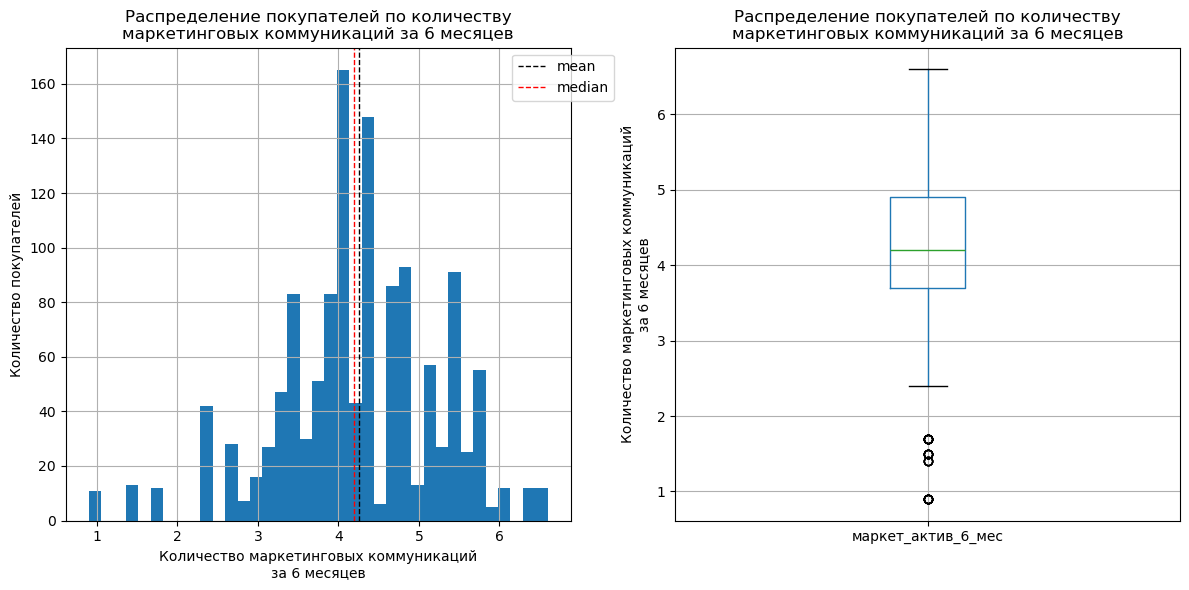

In [36]:
fig, axes = describe_numeric(market_df, 'маркет_актив_6_мес')
axes[0].set_title('Распределение покупателей по количеству\nмаркетинговых коммуникаций за 6 месяцев')
axes[0].set_xlabel('Количество маркетинговых коммуникаций\nза 6 месяцев')
axes[0].set_ylabel('Количество покупателей')
axes[1].set_title('Распределение покупателей по количеству\nмаркетинговых коммуникаций за 6 месяцев')
axes[1].set_ylabel('Количество маркетинговых коммуникаций\nза 6 месяцев')
fig.tight_layout()
plt.show()

Распределение ассиметричное. Пик значения приходится на 4.2. Минимальное значение - 0.9 (то есть нет покупателей, которые вообще не провзаимодействовали с маркетингом), максимальное - 6.6.

#### Маркет_актив_тек_мес

```маркет_актив_тек_мес``` — количество маркетинговых коммуникаций в текущем месяце.

маркет_актив_тек_мес
3    308
4    669
5    323
Name: count, dtype: int64


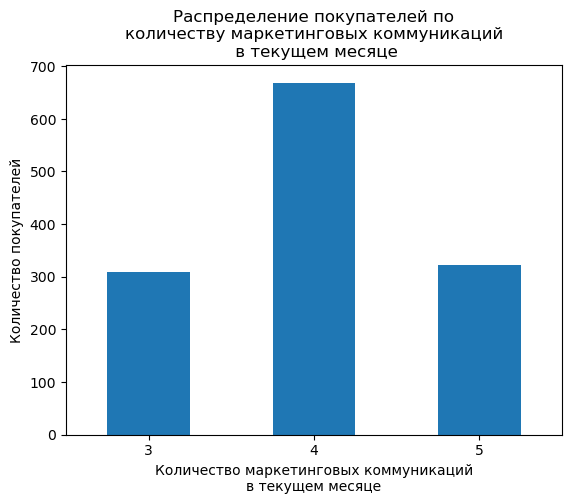

In [37]:
fig, ax = describe_numeric(market_df, 'маркет_актив_тек_мес', discrete=True)
ax.set_title('Распределение покупателей по\nколичеству маркетинговых коммуникаций\n в текущем месяце')
ax.set_xlabel('Количество маркетинговых коммуникаций\nв текущем месяце')
ax.set_ylabel('Количество покупателей')
ax.tick_params(axis='x', labelrotation=0)
plt.show()

Принимает только три значения. На каждого покупателя в текущем месяце приходилось от 3 до 5 маркетинговых коммуникаций. Больше всего покупателей получили 4 маркетинговых коммуникации.

#### Длительность

```длительность``` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

длительность:
count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64
Распределение не выглядит нормальным, p-value = 5.791480627183451e-15


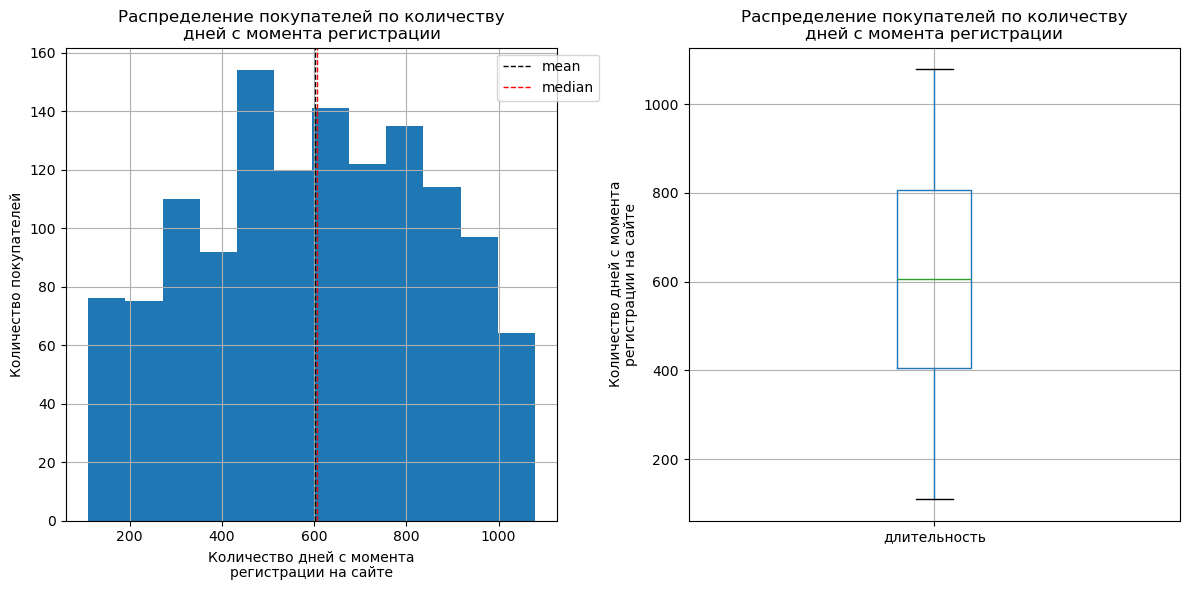

In [38]:
fig, axes = describe_numeric(market_df, 'длительность' , bins='sturges')
axes[0].set_title('Распределение покупателей по количеству\nдней с момента регистрации')
axes[0].set_xlabel('Количество дней с момента\nрегистрации на сайте')
axes[0].set_ylabel('Количество покупателей')
axes[1].set_title('Распределение покупателей по количеству\nдней с момента регистрации')
axes[1].set_ylabel('Количество дней с момента\nрегистрации на сайте')
fig.tight_layout()
plt.show()

Распределение ассиметричное. Медиана - 606 дней, минимум - 110 дней, максимум - 1079.

#### Акционные_покупки

```акционные_покупки``` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

акционные_покупки:
count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64
Распределение не выглядит нормальным, p-value = 5.605193857299268e-45


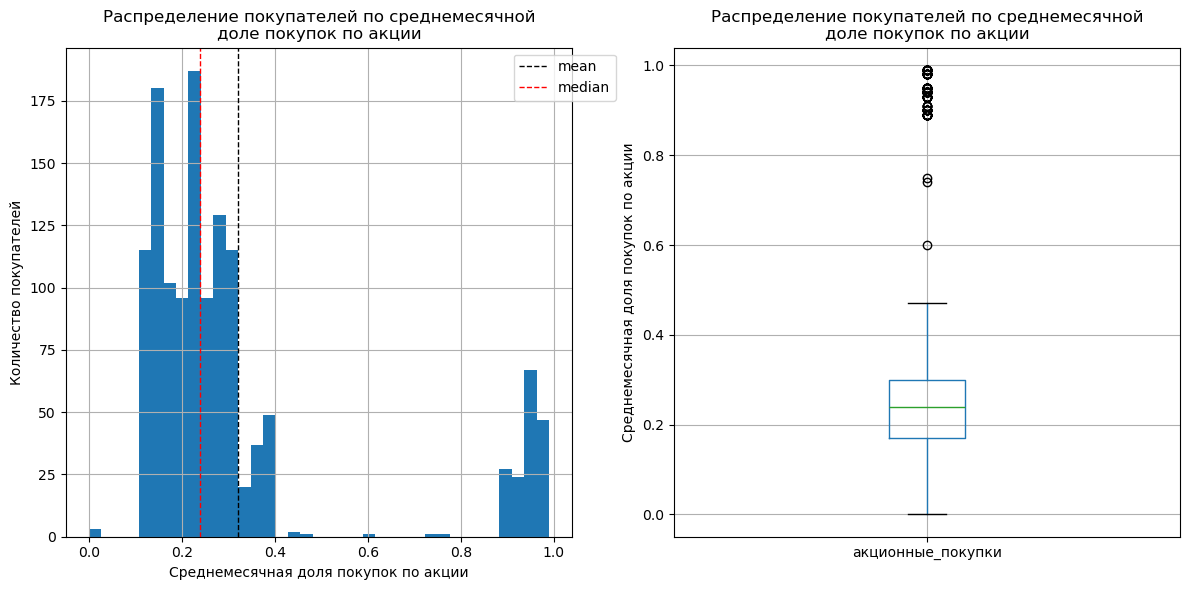

In [39]:
fig, axes = describe_numeric(market_df, 'акционные_покупки')
axes[0].set_title('Распределение покупателей по среднемесячной\nдоле покупок по акции')
axes[0].set_xlabel('Среднемесячная доля покупок по акции')
axes[0].set_ylabel('Количество покупателей')
axes[1].set_title('Распределение покупателей по среднемесячной\nдоле покупок по акции')
axes[1].set_ylabel('Среднемесячная доля покупок по акции')
fig.tight_layout()
plt.show()

Распределение ассиметричное. Пик приходится на 0.24, есть небольшой всплеск в районе 0.9 (то есть основная масса  совершает по акции около четверти покупок, но есть и заметная группа людей, которая большинство покупок делает по акции).

#### Средний_просмотр_категорий_за_визит

```средний_просмотр_категорий_за_визит``` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

средний_просмотр_категорий_за_визит
1    106
2    312
3    356
4    263
5    177
6     86
Name: count, dtype: int64


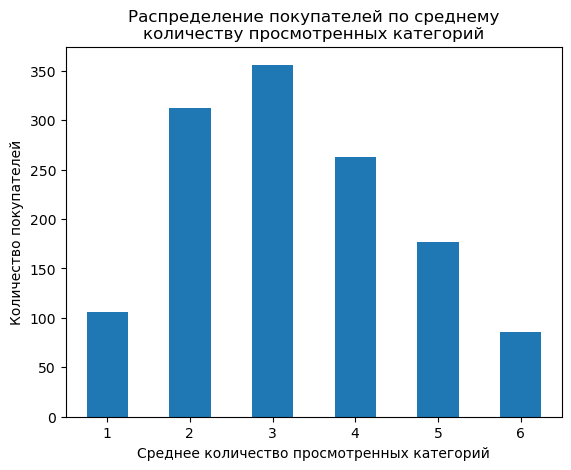

In [40]:
fig, ax = describe_numeric(market_df, 'средний_просмотр_категорий_за_визит', discrete=True)
ax.set_title('Распределение покупателей по среднему\nколичеству просмотренных категорий')
ax.set_xlabel('Среднее количество просмотренных категорий')
ax.set_ylabel('Количество покупателей')
ax.tick_params(axis='x', labelrotation=0)
plt.show()

Принимает целочисленные значения от 1 до 6. Больше всего покупателей просматривают 3 категории за визит, на втором месте 2 категории, затем 4.

#### Неоплаченные_продукты_штук_квартал

```неоплаченные_продукты_штук_квартал``` — общее число неоплаченных товаров в корзине за последние 3 месяца.

неоплаченные_продукты_штук_квартал
0     116
1     261
2     261
3     218
4     197
5     135
6      44
7      34
8      20
9      10
10      4
Name: count, dtype: int64


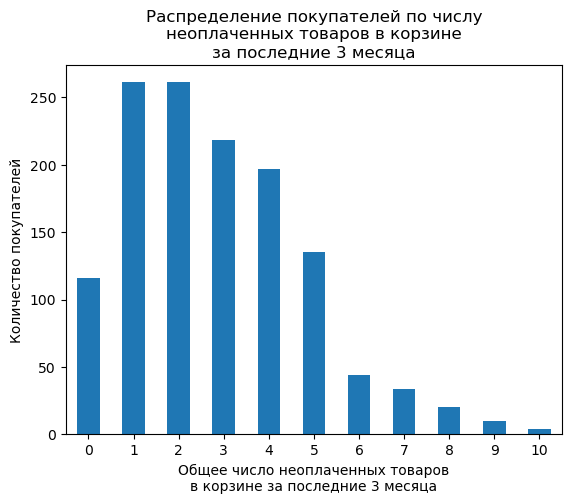

In [41]:
fig, ax = describe_numeric(market_df, 'неоплаченные_продукты_штук_квартал', discrete=True)
ax.set_title('Распределение покупателей по числу\nнеоплаченных товаров в корзине\nза последние 3 месяца')
ax.set_xlabel('Общее число неоплаченных товаров\nв корзине за последние 3 месяца')
ax.set_ylabel('Количество покупателей')
ax.tick_params(axis='x', labelrotation=0)
plt.show()

Принимает целочисленные значения от 0 до 10. У основной массы покупателей за квартал было от 1 до 3 неоплаченных покупок в корзине.

#### Ошибка_сервиса

```ошибка_сервиса``` — число сбоев, которые коснулись покупателя во время посещения сайта.

ошибка_сервиса
0     17
1     74
2    189
3    226
4    257
5    208
6    156
7     92
8     66
9     15
Name: count, dtype: int64


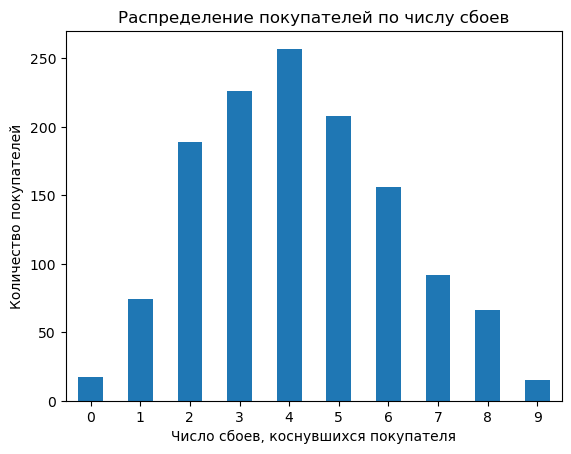

In [42]:
fig, ax = describe_numeric(market_df, 'ошибка_сервиса', discrete=True)
ax.set_title('Распределение покупателей по числу сбоев')
ax.set_xlabel('Число сбоев, коснувшихся покупателя')
ax.set_ylabel('Количество покупателей')
ax.tick_params(axis='x', labelrotation=0)
plt.show()

Принимает целочисленные значения от 0 до 9. Большинство покупателей коснулось от 2 до 6 сбоев.

#### Страниц_за_визит

```страниц_за_визит``` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

страниц_за_визит
1      20
2      58
3      76
4     112
5     115
6     127
7     102
8     109
9     108
10    104
11     92
12     73
13     61
14     53
15     36
16     21
17     19
18      7
19      5
20      2
Name: count, dtype: int64


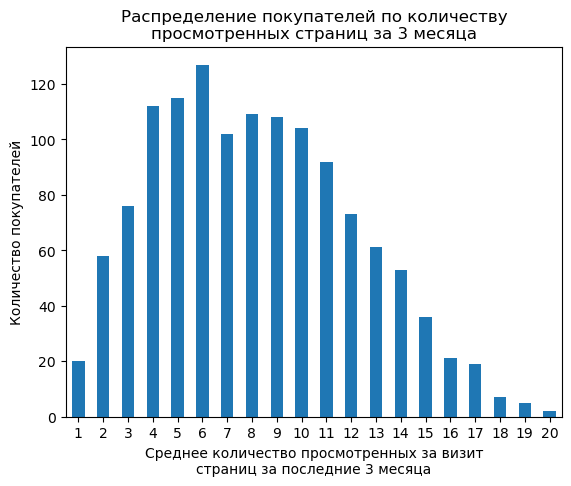

In [43]:
fig, ax = describe_numeric(market_df, 'страниц_за_визит', discrete=True)
ax.set_title('Распределение покупателей по количеству\nпросмотренных страниц за 3 месяца')
ax.set_xlabel('Среднее количество просмотренных за визит\nстраниц за последние 3 месяца')
ax.set_ylabel('Количество покупателей')
ax.tick_params(axis='x', labelrotation=0)
plt.show()

Пик в районе 6 страниц. Минимум 1 страница, максимум - 20 страниц.

### Категориальные данные в датафрейме market_df

Изучим категориальные данные в датафрейме market_df.

#### Покупательская активность

```покупательская_активность``` - рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».

покупательская_активность:
покупательская_активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64


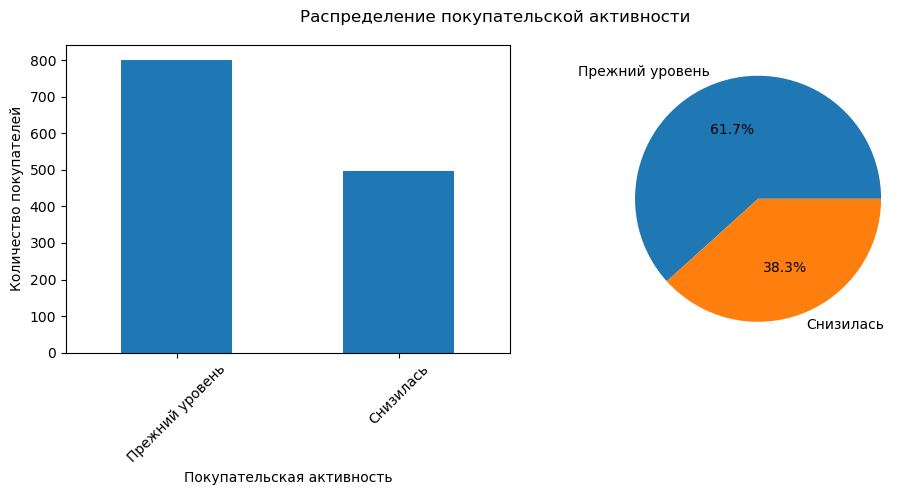

In [44]:
fig, axes = describe_categorical(market_df, 'покупательская_активность')
fig.suptitle('Распределение покупательской активности')
axes[0].set_xlabel('Покупательская активность')
axes[0].set_ylabel('Количество покупателей')
axes[0].tick_params(axis='x', labelrotation=45)
axes[1].set_ylabel('')
fig.tight_layout()
plt.show()

Видим дисбаланс классов - менее 40% записей имеет класс "снизилась". При разбиении выборки нужно будет использовать стратификацию.

#### Тип сервиса

```тип_сервиса``` — уровень сервиса, например «премиум» и «стандарт».

тип_сервиса:
тип_сервиса
стандарт    924
премиум     376
Name: count, dtype: int64


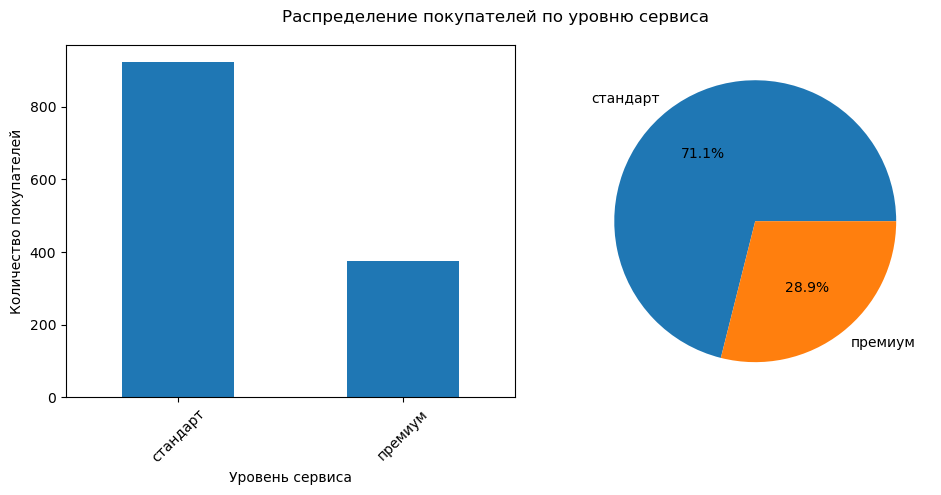

In [45]:
fig, axes = describe_categorical(market_df, 'тип_сервиса')
fig.suptitle('Распределение покупателей по уровню сервиса')
axes[0].set_xlabel('Уровень сервиса')
axes[0].set_ylabel('Количество покупателей')
axes[0].tick_params(axis='x', labelrotation=45)
axes[1].set_ylabel('')
fig.tight_layout()
plt.show()

2 значения - ```премиум``` и ```стандарт```. Большинство (71.1%) покупателей имеют тип "стандарт".

#### Разрешить сообщать

```разрешить_сообщать``` - информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.

разрешить_сообщать:
разрешить_сообщать
да     962
нет    338
Name: count, dtype: int64


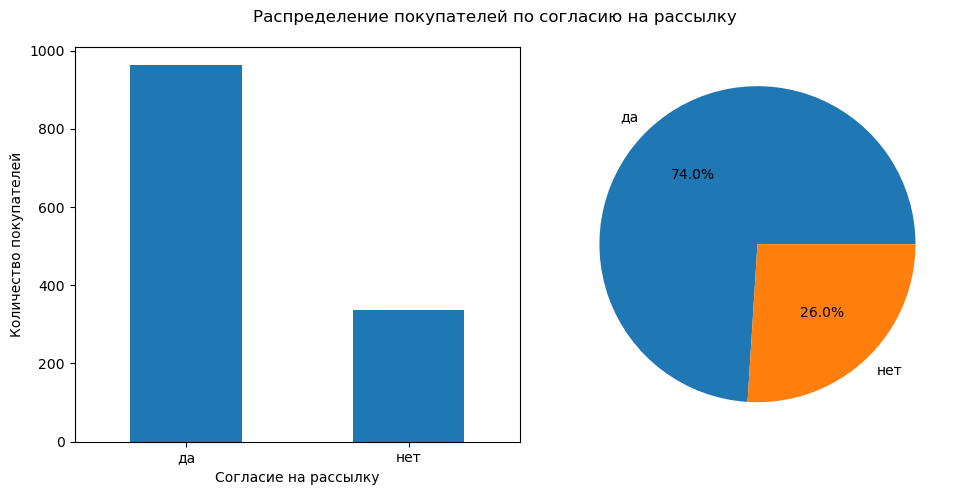

In [46]:
fig, axes = describe_categorical(market_df, 'разрешить_сообщать')
fig.suptitle('Распределение покупателей по согласию на рассылку')
axes[0].set_xlabel('Согласие на рассылку')
axes[0].set_ylabel('Количество покупателей')
axes[0].tick_params(axis='x', labelrotation=0)
axes[1].set_ylabel('')
fig.tight_layout()
plt.show()

Почти три четверти (74%) покупателей дали разрешение на рассылки.

#### Популярная_категория

```популярная_категория``` - самая популярная категория товаров у покупателя за последние 6 месяцев.

In [47]:
market_df['популярная_категория'].value_counts()

популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксессуары                  223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: count, dtype: int64

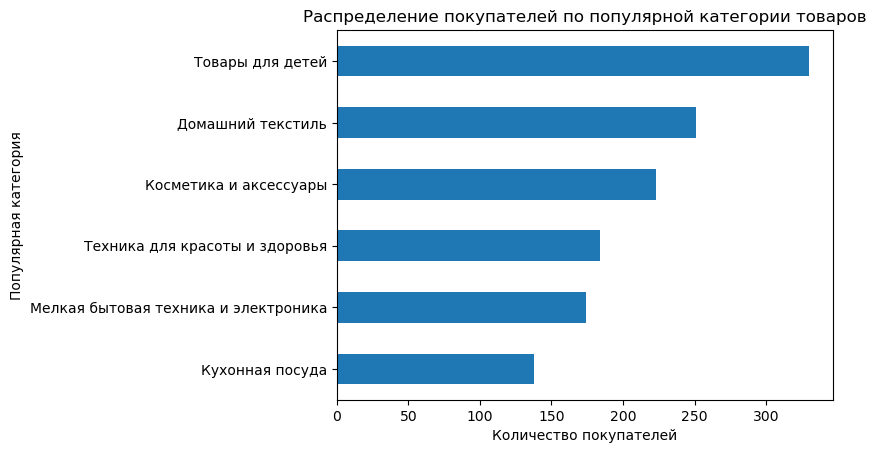

In [48]:
market_df['популярная_категория'].value_counts(ascending=True).plot(kind='barh')
plt.title('Распределение покупателей по популярной категории товаров')
plt.xlabel('Количество покупателей')
plt.ylabel('Популярная категория')
plt.show()

Самая популярная категория - ```товары для детей```, затем ```домашний текстиль``` и ```косметика и аксессуары```. Наименее популярная категория - ```кухонная посуда```.

### Данные в датафрейме market_time

#### Период

```период``` - название периода, во время которого зафиксировано общее время.

период:
период
текущий_месяц       1300
предыдущий_месяц    1300
Name: count, dtype: int64


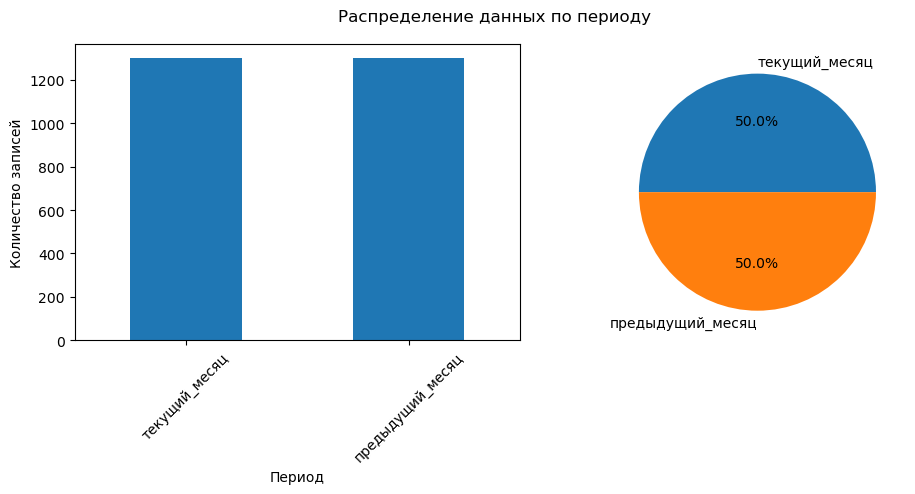

In [49]:
fig, axes = describe_categorical(market_time, 'период')
fig.suptitle('Распределение данных по периоду')
axes[0].set_xlabel('Период')
axes[0].set_ylabel('Количество записей')
axes[0].tick_params(axis='x', labelrotation=45)
axes[1].set_ylabel('')
fig.tight_layout()
plt.show()

В таблице представлено поровну данных за текущий и предыдущий месяцы.

#### Минут

```минут``` - значение времени, проведённого на сайте, в минутах.

минут
4       9
5      22
6      59
7      88
8     141
9     186
10    204
11    221
12    237
13    206
14    256
15    174
16    162
17    163
18    145
19    119
20    101
21     53
22     40
23     14
Name: count, dtype: int64


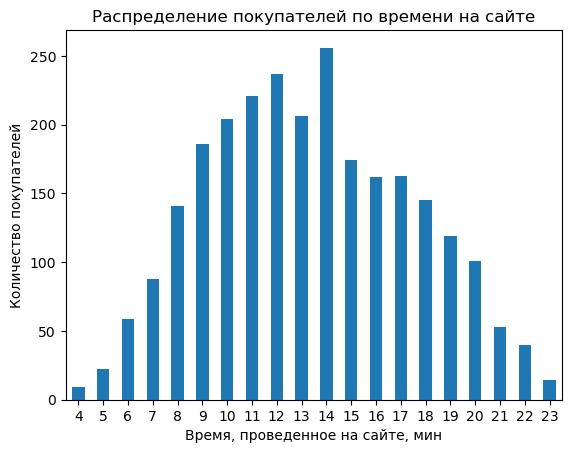

In [50]:
fig, ax = describe_numeric(market_time, 'минут', discrete=True)
ax.set_title('Распределение покупателей по времени на сайте')
ax.set_xlabel('Время, проведенное на сайте, мин')
ax.set_ylabel('Количество покупателей')
ax.tick_params(axis='x', labelrotation=0)
plt.show()

В среднем покупатели проводят на сайте от 9 до 15 минут. Минимум - 4 минуты, максимум - 23.

Посмотрим на распределение параметра за каждый период отдельно.

минут
4       9
5      11
6      35
7      45
8      72
9     109
10    104
11    106
12    118
13     96
14    138
15     68
16     81
17     70
18     64
19     58
20     51
21     27
22     30
23      8
Name: count, dtype: int64


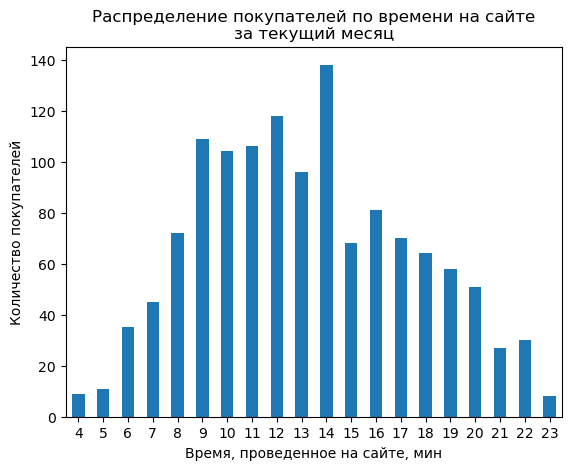

In [51]:
fig, ax = describe_numeric(market_time.query('период == "текущий_месяц"'), 'минут', discrete=True)
ax.set_title('Распределение покупателей по времени на сайте\nза текущий месяц')
ax.set_xlabel('Время, проведенное на сайте, мин')
ax.set_ylabel('Количество покупателей')
ax.tick_params(axis='x', labelrotation=0)
plt.show()

минут
5      11
6      24
7      43
8      69
9      77
10    100
11    115
12    119
13    110
14    118
15    106
16     81
17     93
18     81
19     61
20     50
21     26
22     10
23      6
Name: count, dtype: int64


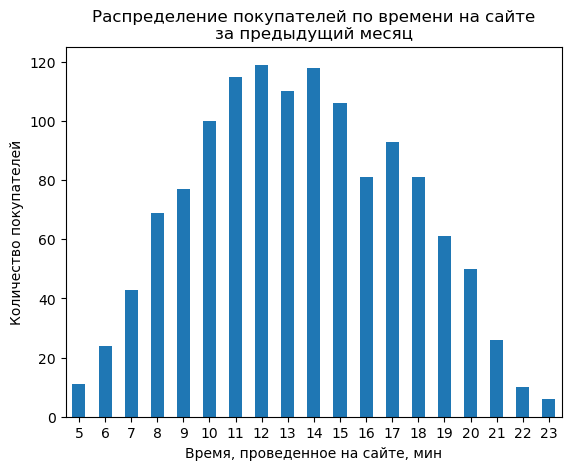

In [52]:
fig, ax = describe_numeric(market_time.query('период == "предыдущий_месяц"'), 'минут', discrete=True)
ax.set_title('Распределение покупателей по времени на сайте\nза предыдущий месяц')
ax.set_xlabel('Время, проведенное на сайте, мин')
ax.set_ylabel('Количество покупателей')
ax.tick_params(axis='x', labelrotation=0)
plt.show()

В текущем месяце чуть более резкое снижение времени после прохождения пика в 14 минут. Минимум времени за текущий месяц - 4 минуты, а за прошлый было 5.

### Данные в датафрейме market_money

#### Период

```период``` - название периода, во время которого зафиксирована выручка.

период:
период
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: count, dtype: int64


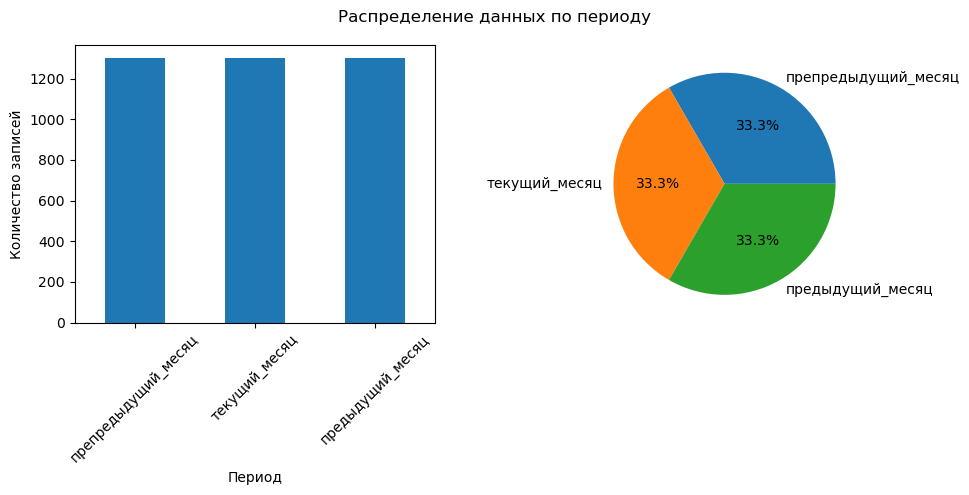

In [53]:
fig, axes = describe_categorical(market_money, 'период')
fig.suptitle('Распределение данных по периоду')
axes[0].set_xlabel('Период')
axes[0].set_ylabel('Количество записей')
axes[0].tick_params(axis='x', labelrotation=45)
axes[1].set_ylabel('')
fig.tight_layout()
plt.show()

В таблице поровну данных за три периода: текущий, предыдущий и препредыдущий месяцы.

#### Выручка

```выручка``` - сумма выручки за период.

выручка:
count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64
Распределение не выглядит нормальным, p-value = 0.0


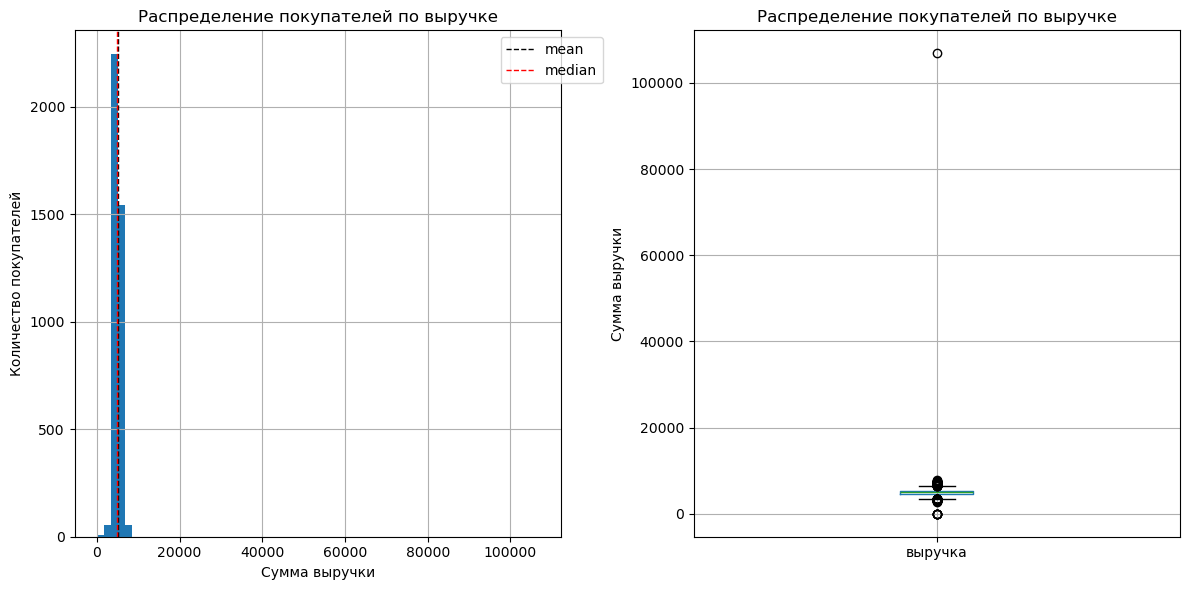

In [54]:
fig, axes = describe_numeric(market_money, 'выручка')
axes[0].set_title('Распределение покупателей по выручке')
axes[0].set_xlabel('Сумма выручки')
axes[0].set_ylabel('Количество покупателей')
axes[1].set_title('Распределение покупателей по выручке')
axes[1].set_ylabel('Сумма выручки')
fig.tight_layout()
plt.show()

Видим выброс.

In [55]:
market_money.query('выручка > 100000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [56]:
outlier_revenue_id = market_money.query('выручка > 100000')['id'].tolist()

выручка:
count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: выручка, dtype: float64
Распределение не выглядит нормальным, p-value = 9.423936447300753e-32


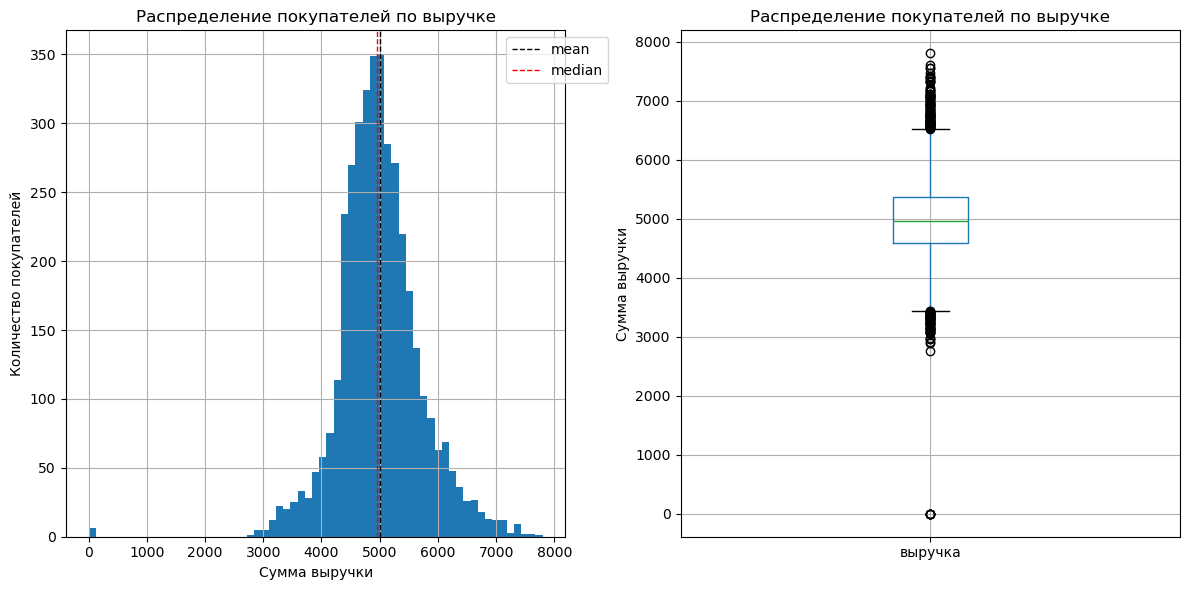

In [57]:
fig, axes = describe_numeric(market_money.query('выручка < 100000'), 'выручка')
axes[0].set_title('Распределение покупателей по выручке')
axes[0].set_xlabel('Сумма выручки')
axes[0].set_ylabel('Количество покупателей')
axes[1].set_title('Распределение покупателей по выручке')
axes[1].set_ylabel('Сумма выручки')
fig.tight_layout()
plt.show()

Видим несколько нулевых значений.

In [58]:
market_money.query('выручка == 0')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [59]:
zero_revenue_id = market_money.query('выручка == 0')['id'].drop_duplicates().tolist()

In [60]:
market_money.query('id in @zero_revenue_id')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
27,215357,текущий_месяц,5986.3
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
33,215359,текущий_месяц,4735.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


У этих трех пользователей есть выручка только за текущий месяц и нет выручки за предыдущие два.

Среднее и медиана - в районе 5000, основная масса значений лежит в промежутке от 4.5 до 5.5 тысяч.

### Данные в датафрейме money

#### Прибыль

```прибыль``` — значение прибыли.

прибыль:
count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64
Распределение выглядит нормальным, p-value = 0.2580398917198181


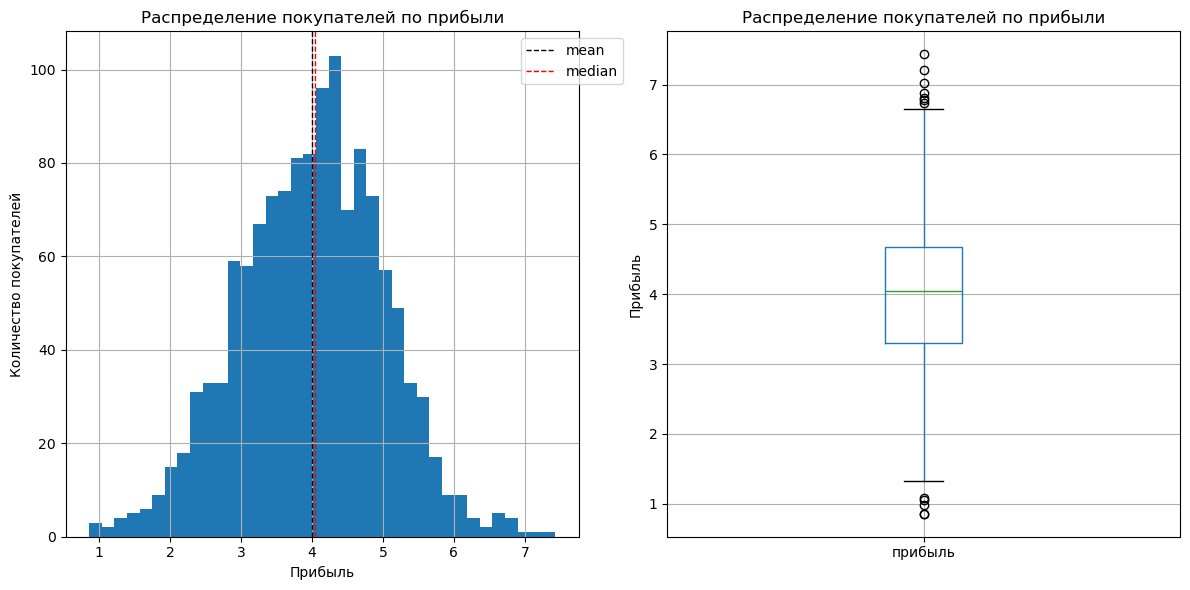

In [61]:
fig, axes = describe_numeric(money, 'прибыль')
axes[0].set_title('Распределение покупателей по прибыли')
axes[0].set_xlabel('Прибыль')
axes[0].set_ylabel('Количество покупателей')
axes[1].set_title('Распределение покупателей по прибыли')
axes[1].set_ylabel('Прибыль')
fig.tight_layout()
plt.show()

Среднее и медиана - в районе 4, минимальное значение - 0.86, максимальное - 7.43. На боксплоте видим небольшое количество выбросов сверху и снизу.

### Удаление выбросов и отбор клиентов с покупательской активностью не менее трёх месяцев

В результате анализа получили id покупателя с выбросом выручки в таблице ```market_money```, а также id трех покупателей с активностью менее трех месяцев.

Удалим данные об этих пользователях из всех таблиц.

In [62]:
print(market_df.shape, market_time.shape, market_money.shape, money.shape)

(1300, 13) (2600, 3) (3900, 3) (1300, 2)


In [63]:
ids_to_del = zero_revenue_id + outlier_revenue_id

In [64]:
market_df = market_df.query('~id.isin(@ids_to_del)').reset_index(drop=True)
market_time = market_time.query('~id.isin(@ids_to_del)').reset_index(drop=True)
market_money = market_money.query('~id.isin(@ids_to_del)').reset_index(drop=True)
money = money.query('~id.isin(@ids_to_del)').reset_index(drop=True)

Проверим размерности

In [65]:
print(market_df.shape, market_time.shape, market_money.shape, money.shape)

(1296, 13) (2592, 3) (3888, 3) (1296, 2)


Всё ОК, из ```market_df``` и ```money``` удалено по 4 объекта, из ```market_time``` - 8 объектов (данные по 4 пользователям за 2 периода) и из ```market_money``` - 12 объектов (данные по 4 пользователям за 3 периода).

### Исследовательский анализ данных - итог

Провели исследовательский анализ данных.

В таблице ```market_df``` (```market_file.csv```) данные о поведении 1300 покупателей:
1. ```маркет_актив_6_мес``` - распределение ассиметричное. Пик значения приходится на 4.2. Минимальное значение - 0.9 (то есть нет покупателей, которые вообще не провзаимодействовали с маркетингом), максимальное - 6.6.
2. ```маркет_актив_тек_мес``` - принимает только три значения. На каждого покупателя в текущем месяце приходилось от 3 до 5 маркетинговых коммуникаций. Больше всего покупателей получили 4 маркетинговых коммуникации.
3. ```длительность``` - распределение ассиметричное. Медиана - 606 дней, минимум - 110 дней, максимум - 1079.
4. ```акционные_покупки``` - распределение ассиметричное. Пик приходится на 0.24, есть небольшой всплеск в районе 0.9.
5. ```средний_просмотр_категорий_за_визит``` - принимает целочисленные значения от 1 до 6. Больше всего покупателей просматривают 3 категории за визит.
6. ```неоплаченные_продукты_штук_квартал``` - принимает целочисленные значения от 0 до 10. У основной массы покупателей за квартал было от 1 до 3 неоплаченных покупок в корзине.
7. ```ошибка_сервиса``` - принимает целочисленные значения от 0 до 9. Большинство покупателей коснулось от 2 до 6 сбоев.
8. ```страниц_за_визит``` - пик в районе 6 страниц. Минимум 1 страница, максимум - 20 страниц.
9. ```покупательская_активность``` - целевой признак. Видим дисбаланс классов - менее 40% записей имеет класс "снизилась".
10. ```тип_сервиса``` - 2 значения - ```премиум``` и ```стандарт```. Большинство (71.1%) покупателей имеют тип "стандарт".
11. ```разрешить_сообщать``` - почти три четверти (74%) покупателей дали разрешение на рассылки.
12. ```популярная_категория``` - самая популярная категория - ```товары для детей```, затем ```домашний текстиль``` и ```косметика и аксессуары```. Наименее популярная категория - ```кухонная посуда```.

В таблице ```market_time``` (```market_time.csv```) данные о времени (в минутах), которое покупатель провёл на сайте в течение одного из двух периодов - текущий месяц или предыдущий месяц. В среднем покупатели проводят на сайте 13 минут. Минимум - 4 минуты, максимум - 23.

В таблице ```market_money``` (```market_money.csv```) данные о выручке, которую получает магазин с покупателя. Среднее и медиана - в районе 5000, основная масса значений лежит в промежутке от 4.5 до 5.5 тысяч.

В таблице ```money``` (```money.csv```) данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. Среднее и медиана - в районе 4, минимальное значение - 0.86, максимальное - 7.43. На боксплоте видим небольшое количество выбросов сверху и снизу.

В результате анализа нашли и удалили выброс выручки (более 100000 при медиане 5000) в таблице ```market_money```.

Отобрали клиентов с покупательской активностью не менее трёх месяцева - удалили данные трех покупателей с активностью менее трех месяцев (не совершали покупки в предыдущем и препредыдущем месяцах).

## Объединение таблиц

Объединим таблицы ```market_df```, ```market_time```, ```market_money```.

Данные о выручке и времени на сайте находятся в одном столбце для всех периодов. Создадим отдельные столбцы.

In [66]:
market_time = market_time.pivot_table(index='id', columns=['период'], values='минут')

In [67]:
market_time.head()

период,предыдущий_месяц,текущий_месяц
id,,
215349,12.0,10.0
215350,8.0,13.0
215351,11.0,13.0
215352,8.0,11.0
215353,10.0,10.0


In [68]:
market_time.columns = ['минут_пред_мес', 'минут_тек_мес']

In [69]:
market_time.head()

,минут_пред_мес,минут_тек_мес
id,,
215349,12.0,10.0
215350,8.0,13.0
215351,11.0,13.0
215352,8.0,11.0
215353,10.0,10.0


Разделили данные о времени на сайте на два столбца по периодам.

Проделаем то же самое с выручкой в таблице ```market_money```.

In [70]:
market_money = market_money.pivot_table(index='id', columns=['период'], values='выручка')

In [71]:
market_money.head()

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5


In [72]:
market_money.columns = ['выручка_пред_мес', 'выручка_препред_мес', 'выручка_тек_мес']

In [73]:
market_money.head()

,выручка_пред_мес,выручка_препред_мес,выручка_тек_мес
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5


Разделили данные о выручке на столбцы по периодам.

Преобразуем столбец ```id``` датафрейма ```market_df``` в индекс (для обучения эти данные не понадобятся) и объединим таблицы.

In [74]:
market_df = market_df.set_index('id')

In [75]:
data = market_df.join(market_time).join(market_money)

In [76]:
data.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_пред_мес,минут_тек_мес,выручка_пред_мес,выручка_препред_мес,выручка_тек_мес
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12.0,10.0,5216.0,4472.0,4971.6
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8.0,13.0,5457.5,4826.0,5058.4
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11.0,13.0,6158.0,4793.0,6610.4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8.0,11.0,5807.5,4594.0,5872.5
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10.0,10.0,4738.5,5124.0,5388.5


Проверим размерности получившейся таблицы.

In [77]:
print(data.shape, market_df.shape, market_time.shape, market_money.shape)

(1296, 17) (1296, 12) (1296, 2) (1296, 3)


In [78]:
data.isna().sum()

покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
минут_пред_мес                         0
минут_тек_мес                          0
выручка_пред_мес                       0
выручка_препред_мес                    0
выручка_тек_мес                        0
dtype: int64

Всё ОК, количество столбцов в новой таблице равно сумме количеств столбцов трех таблиц, количество строк во всех таблицах одинаково, пропусков нет.

## Корреляционный анализ

Проведем корреляционный анализ данных, проверим признаки на наличие мультиколлинеарности.

Построим матрицу корреляций для всех входных признаков в датасете.

In [79]:
interval_cols = data.select_dtypes(include='number').columns.tolist()

In [80]:
phik_overview = phik_matrix(data, interval_cols=interval_cols)

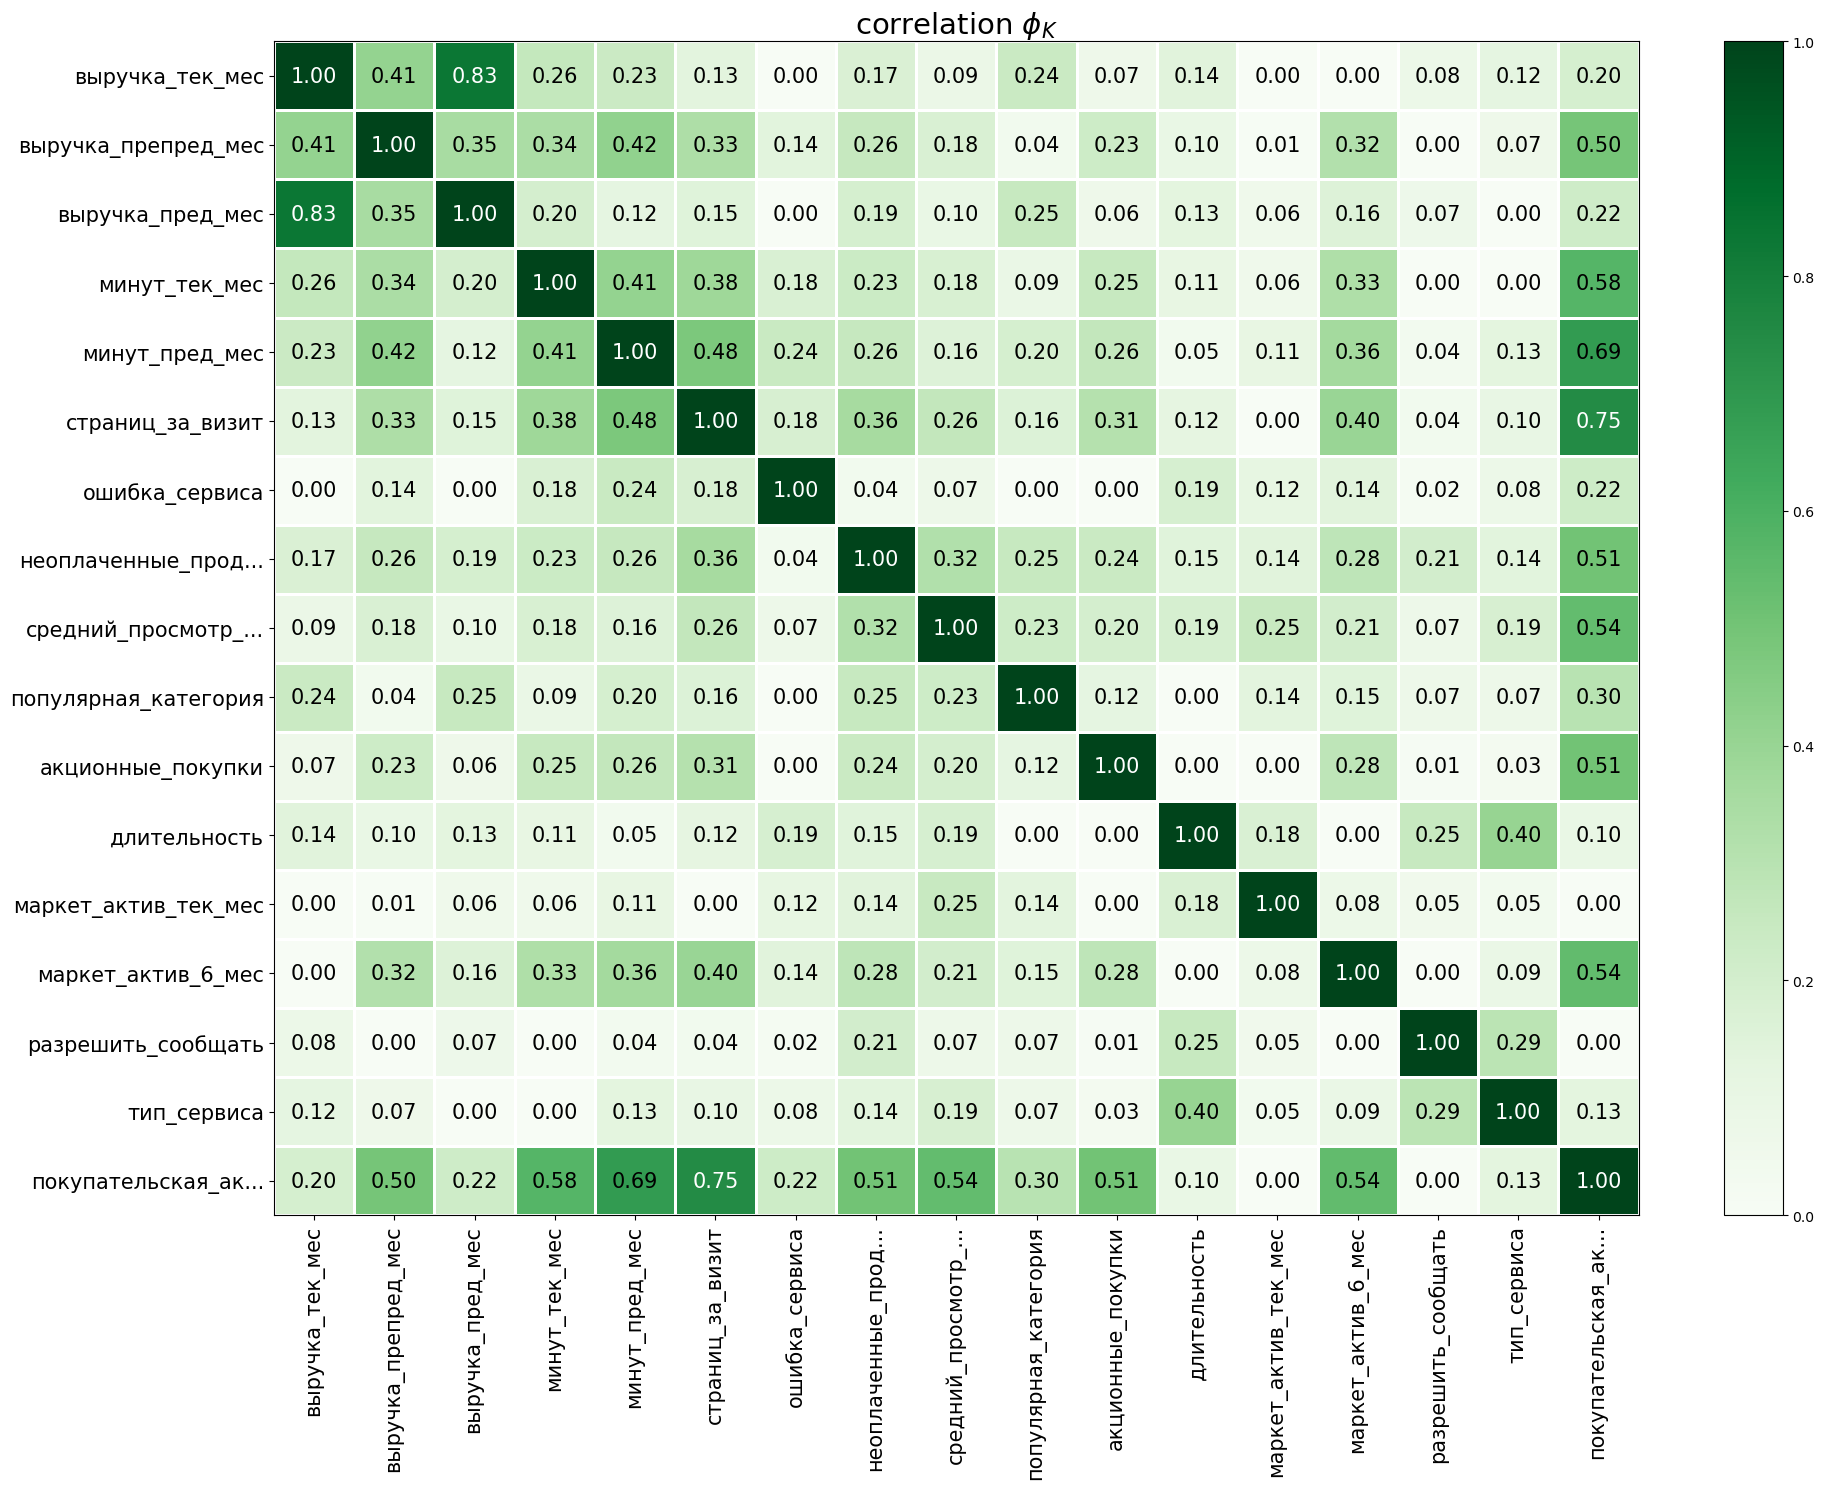

In [81]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

Высокая связь наблюдается между признаками ```выручка_тек_мес``` и ```выручка_пред_мес```.

Построим хитмап отдельно для каждого значения целевого признака, чтобы проверить, нет ли разницы во влиянии признаков на классы.

In [82]:
phik_overview = phik_matrix(
    data.query('покупательская_активность == "Снизилась"').drop(columns='покупательская_активность'), 
    interval_cols=interval_cols
)

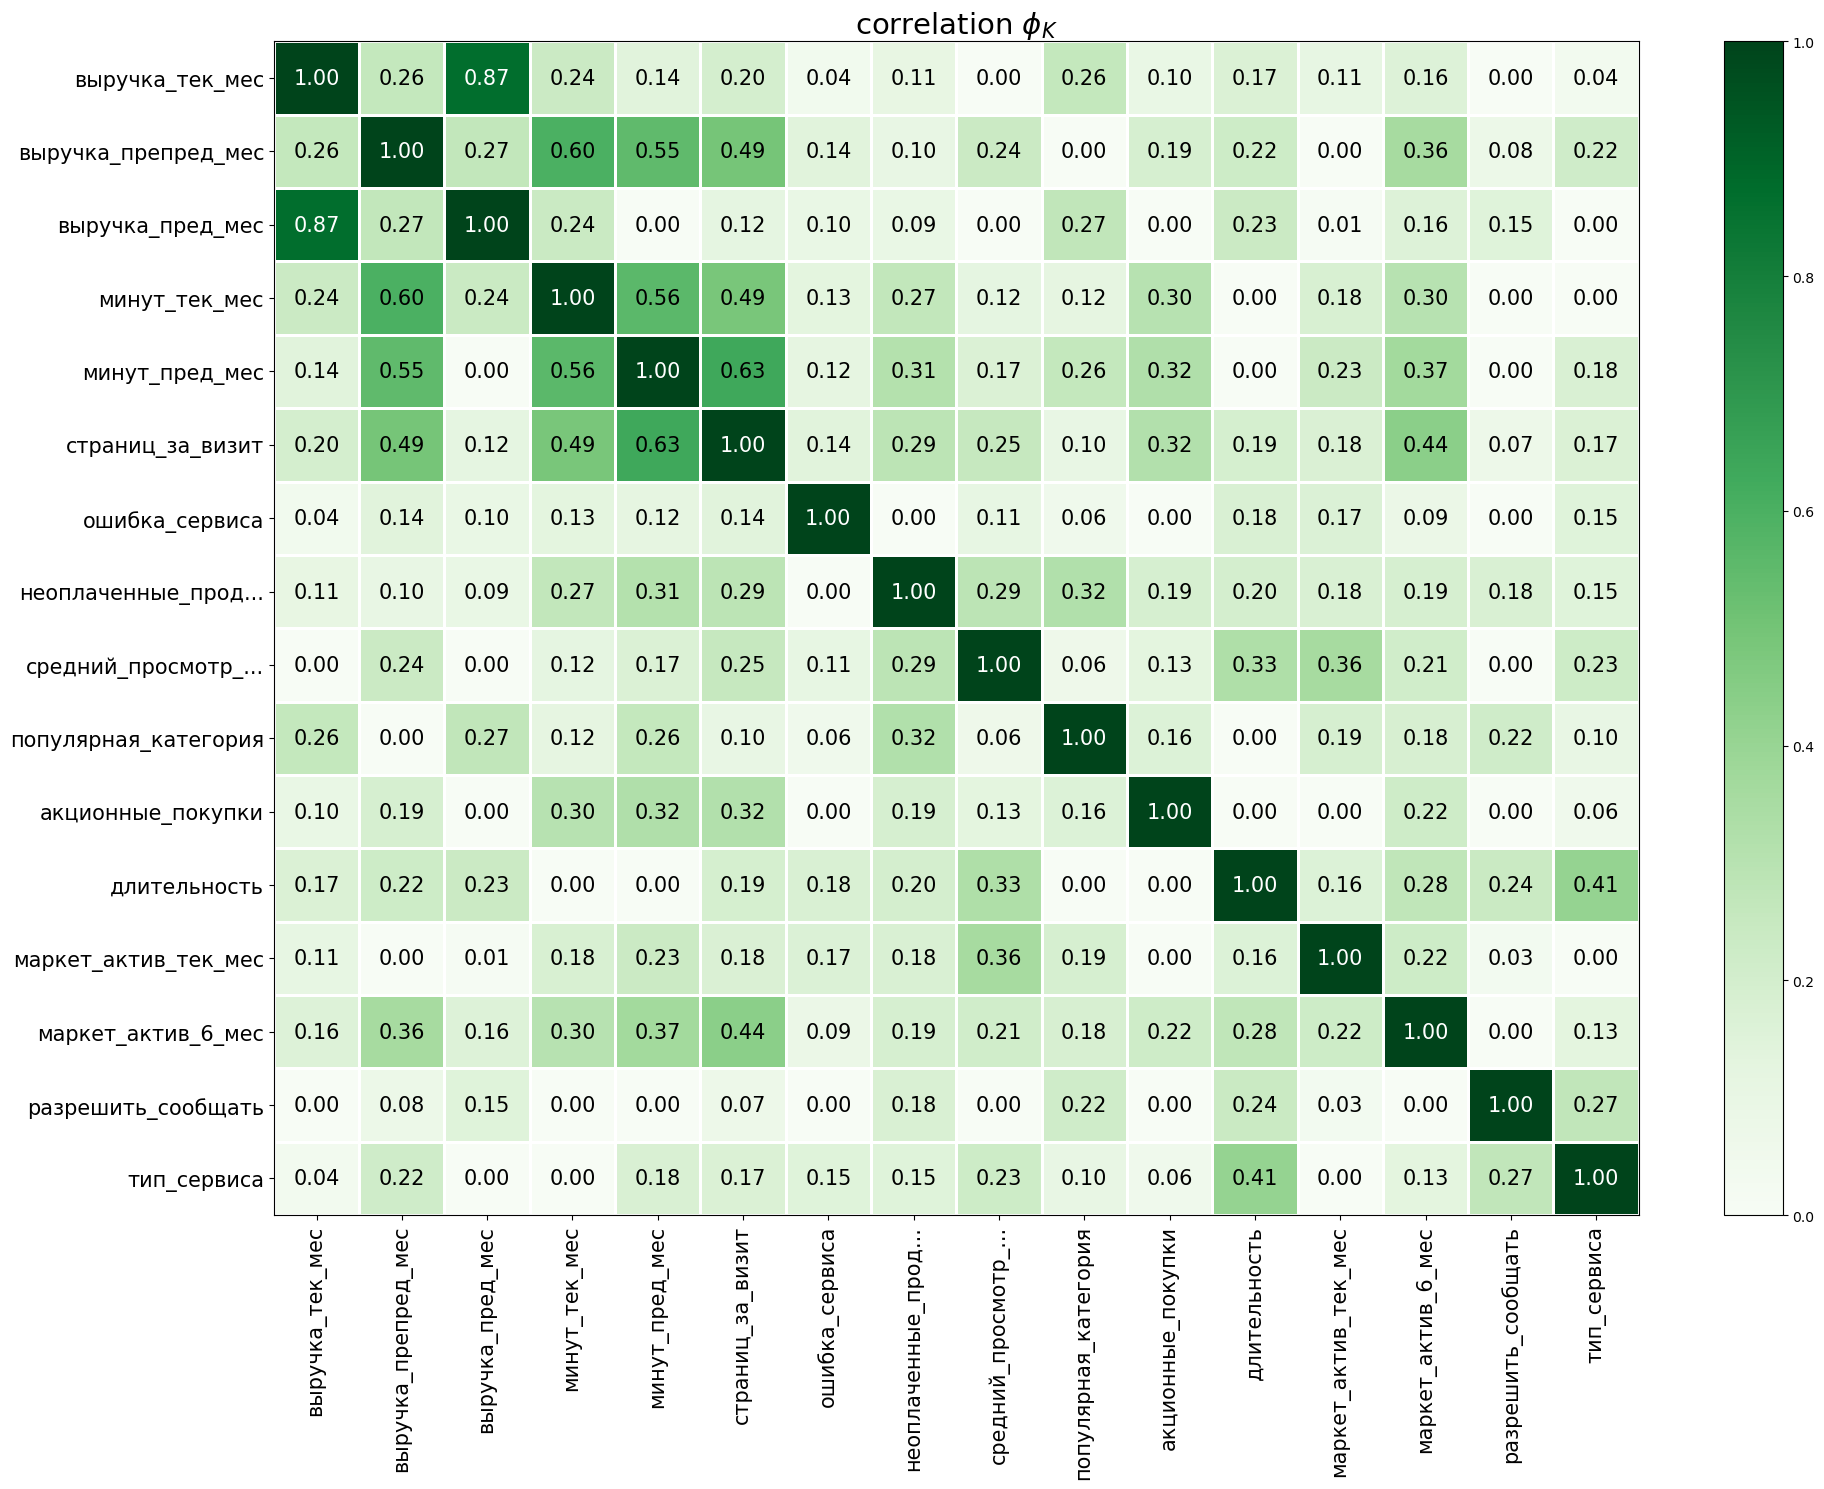

In [83]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

In [84]:
phik_overview = phik_matrix(
    data.query('покупательская_активность == "Прежний уровень"').drop(columns='покупательская_активность'), 
    interval_cols=interval_cols
)

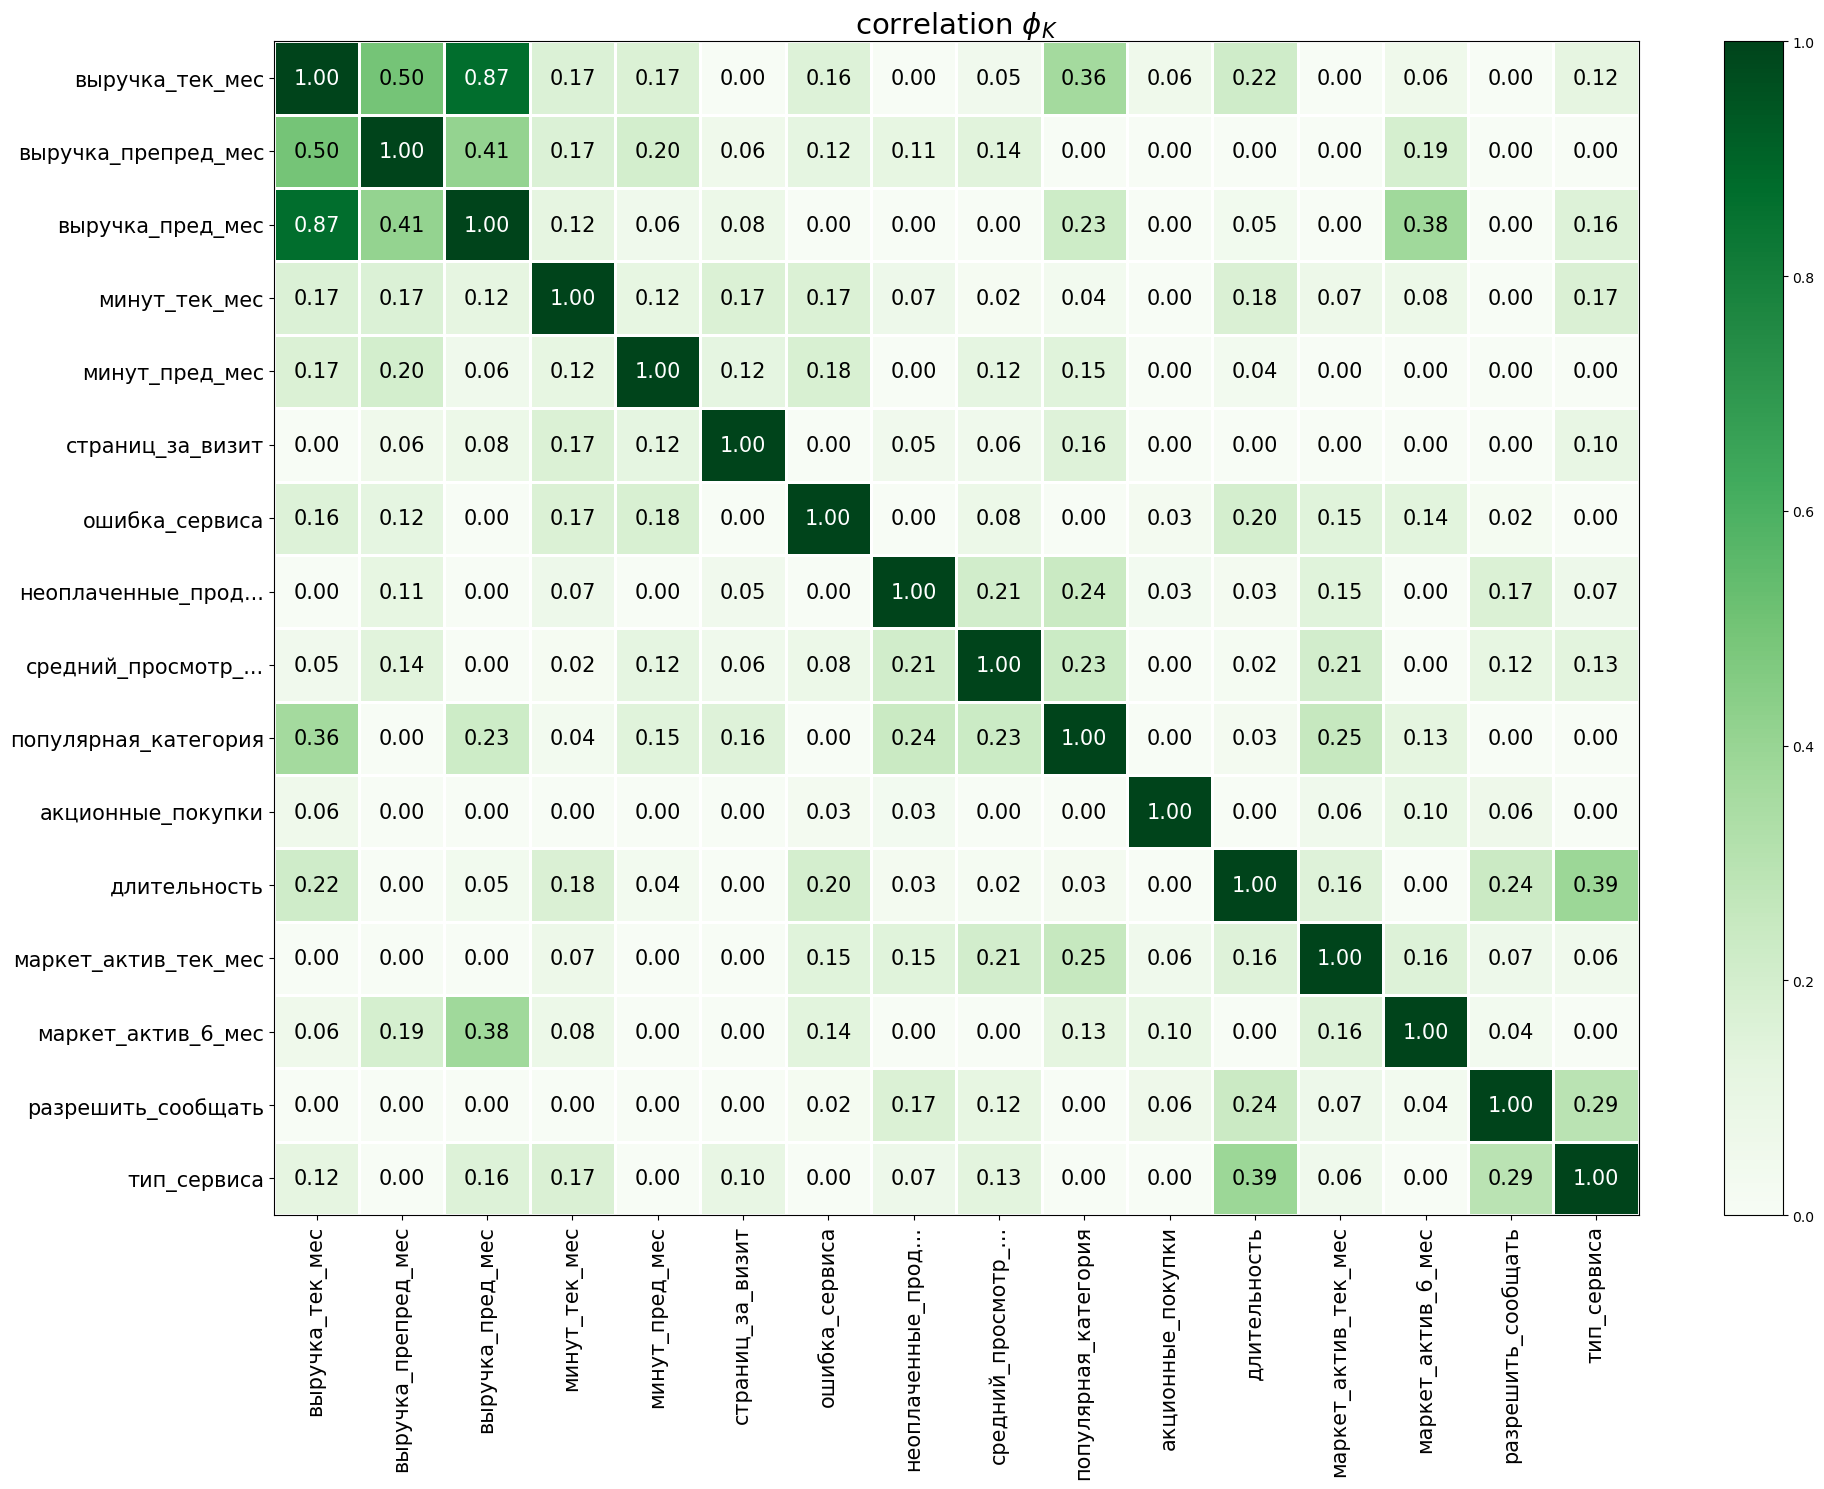

In [85]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

Ситуация по отдельным значениям класса и в общей картине в целом сходные. 

Видим пару признаков с высокой корреляцией - ```выручка_тек_мес``` и ```выручка_пред_мес```.

Удалим признак ```выручка пред мес```.

In [86]:
data = data.drop(columns='выручка_пред_мес')

### Корреляционный анализ - итог

Провели коррелационный анализ данных. Сделали выводы о мультиколлинеарности: есть высокая корреляция между признаками ```выручка_тек_мес``` и ```выручка_пред_мес```. Устранили мультиколлинеарность, удалив из таблицы признак ```выручка_пред_мес```.

## Использование пайплайнов

### Создание пайплайнов

Создадим пайплайны для подготовки данных и обучения моделей.

<a id='fixes_blocker_ordinalencoder'></a>Введём обозначения для типов исходных данных.

In [87]:
ohe_columns = ['популярная_категория', 'разрешить_сообщать']
ord_columns = ['тип_сервиса']
num_columns = data.select_dtypes(include='number').columns.tolist()

Добавляем в пайплайн OHE-кодирование.

In [88]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
        )
    ]
) 

Добавляем Ordinal-кодирование в пайплайн.

In [89]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[['стандарт', 'премиум']],
                handle_unknown='use_encoded_value', 
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

Объединяем шаги подготовки в пайплайн.

+ Применяем пайплайн ```ohe_pipe``` к данным ohe_columns, которые требуют OHE-кодирования. Это шаг ```ohe```.
+ Применяем пайплайн ```ord_pipe``` к данным ord_columns, которые требуют Ordinal-кодирования. Это шаг ```ord```.
+ Масштабируем данные num_columns. Это шаг ```num```.

In [90]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

Создаём итоговый пайплайн для обучения модели.

In [91]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

### Подготовка данных

Выделим целевой и входные признаки.

In [92]:
X = data.drop(columns='покупательская_активность')
y = data['покупательская_активность']

Разделим выборку на train и test с учетом дисбаланса.

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE,
    test_size = TEST_SIZE,
    stratify=y
) 

Проверим размерности получившихся выборок.

In [94]:
print(data.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print('Всего строк: ', data.shape[0], 'Train+test:', X_train.shape[0] + X_test.shape[0])
print('Строк Train: ', X_train.shape[0], ',', y_train.shape[0])
print('Строк Test: ', X_test.shape[0], ',', y_test.shape[0])

(1296, 16) (972, 15) (972,) (324, 15) (324,)
Всего строк:  1296 Train+test: 1296
Строк Train:  972 , 972
Строк Test:  324 , 324


С размерностями всё ОК.

Закодируем целевой признак, используя LabelEncoder.

In [95]:
y_train.head()

id
215858    Прежний уровень
215361          Снизилась
215884    Прежний уровень
216564    Прежний уровень
215715          Снизилась
Name: покупательская_активность, dtype: object

In [96]:
le = LabelEncoder()

In [97]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [98]:
y_train[:5]

array([0, 1, 0, 0, 1])

### Подбор лучшей модели

Используем RandomizedSearchCV, чтобы перебрать модели и их гиперпараметры.

У нас бинарная классификация с несбалансированной выборкой, поэтому оценивать будем метрику ROC-AUC.

In [99]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__kernel': ['linear', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
]

In [100]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [101]:
randomized_search.fit(X_train, y_train)

E:\Coding\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['популярная_категория',
                                                                                'разрешить_сообщать']),
                                                                              ('ord',
                                                                               Pipeline(steps...
                                        {'models': [LogisticRegression(C=2,
                                                                       random_state=42)],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(random_state=42)],
                                         'models__kernel': ['linear', 'rbf',
                                                            'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [102]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['популярная_категория',
                                                   'разрешить_сообщать']),
                                                 ('ord',
                                        

Лучшая модель - LogisticRegression(C=2). ROC_AUC на кросс-валидации - 0.898.

In [103]:
pd.DataFrame(randomized_search.cv_results_).sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__max_features,param_models__max_depth,param_models,param_models__n_neighbors,param_models__kernel,param_models__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.138340,0.147642,0.007471,0.004273,MinMaxScaler(),NaN,NaN,"LogisticRegression(C=2, random_state=42)",NaN,NaN,2,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.896136,0.908000,0.891441,0.919482,0.872973,0.897606,0.015707,1
8,0.026458,0.009593,0.019073,0.003327,RobustScaler(),NaN,NaN,"LogisticRegression(C=2, random_state=42)",NaN,NaN,1,"{'preprocessor__num': RobustScaler(), 'models_...",0.895801,0.904778,0.891667,0.920383,0.870270,0.896580,0.016436,2
6,0.058820,0.028543,0.009384,0.007662,MinMaxScaler(),NaN,NaN,SVC(random_state=42),NaN,linear,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.886531,0.910444,0.893018,0.913176,0.869595,0.894553,0.016056,3
4,0.037476,0.000816,0.565046,0.000816,MinMaxScaler(),NaN,NaN,KNeighborsClassifier(),4,NaN,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.874860,0.897611,0.815935,0.846171,0.849043,0.856724,0.027694,4
1,0.184478,0.008553,0.025697,0.000000,passthrough,4,4,DecisionTreeClassifier(random_state=42),NaN,NaN,NaN,"{'preprocessor__num': 'passthrough', 'models__...",0.800034,0.846056,0.848367,0.838682,0.790034,0.824634,0.024584,5


In [104]:
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Метрика ROC-AUC на тестовой выборке: 0.893156170367674


Построим матрицу ошибок.

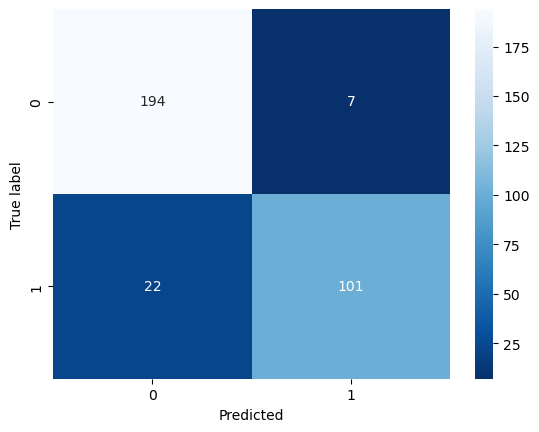

In [105]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

### Использование пайплайнов - итог

Подобрали лучшую модель и ее параметры, используя пайплайны и RandomizedSearchCV.

Использовали метрику ROC-AUC, т.к. она хорошо подходит для нашей задачи (бинарная классификация с несбалансированной выборкой).

Лучшая модель - LogisticRegression(C=2).

ROC-AUC на кросс-валидации: 0.898.

ROC-AUC на тестовой выборке: 0.893.


##  Анализ важности признаков

###  Оценка важности признаков для лучшей модели 

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. 

Возьмем лучшую модель.

In [106]:
model = randomized_search.best_estimator_.named_steps['models']

Преобразуем тестовую выборку.

In [107]:
X_test_new = pd.DataFrame(
    randomized_search.best_estimator_.named_steps['preprocessor'].transform(X_test),
    columns=randomized_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()    
) 

Построим график общей значимости признаков.

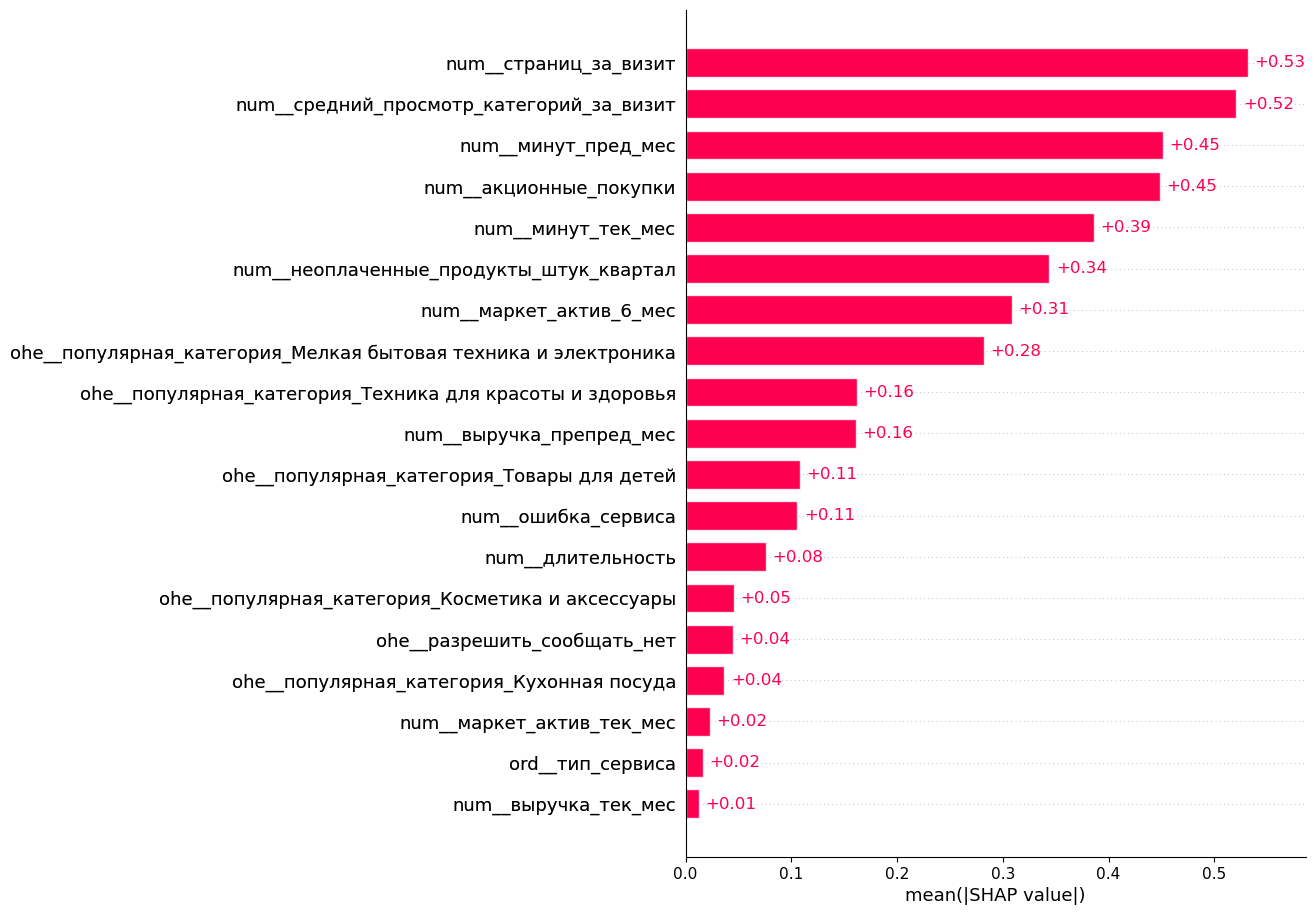

In [108]:
explainer = shap.LinearExplainer(model, X_test_new)
shap_values = explainer(X_test_new)
shap.plots.bar(shap_values, max_display=20) 

Больше всего влияют признаки:
+ среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца
+ средний просмотр категорий за визит в течение последнего месяца
+ время, проведённое на сайте в предыдущем месяце
+ среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев
+ время, проведённое на сайте в текущем месяце

Меньше всего влияют признаки:
+ уровень сервиса
+ выручка за текущий месяц
+ количество маркетинговых коммуникаций в текущем месяце

Посмотрим, как признаки влияют на каждое предсказание модели.

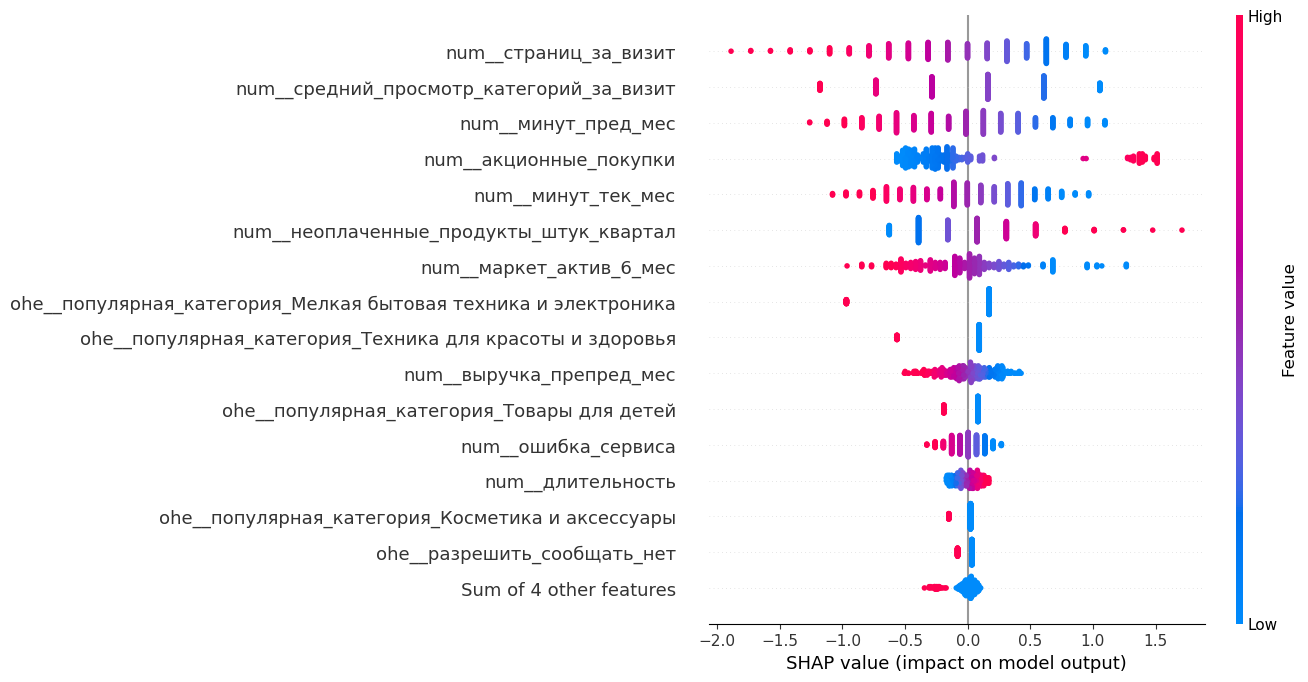

In [109]:
shap.plots.beeswarm(shap_values, max_display=16) 

+ при увеличении количества страниц за визит увеличивается вероятность принадлежности к классу 0 (прежняя покупательская способность)
+ при увеличении количества просмотренных категорий за визит увеличивается вероятность принадлежности к классу 0 (прежняя покупательская способность)
+ при увеличении количества акционных покупок увеличивается вероятность принадлежности к классу 1 (покупательская способность снижается)
+ при увеличении времени, проведенного на сайте (в предыдущем или текущем месяце) увеличивается вероятность принадлежности к классу 0 (прежняя покупательская способность)
+ при увеличении количества оставленных в корзине неоплаченных покупок увеличивается вероятность принадлежности к классу 1 (покупательская способность снижается)

### Отдельные примеры неверно классифицированных объектов

Посмотрим на некорректно классифицированный FN объект и то, какие признаки повлияли на решение модели.

In [110]:
X_test_df = pd.DataFrame()
X_test_df['y_test'] = y_test.tolist()
X_test_df['predict_proba'] = randomized_search.predict_proba(X_test)[:,1]

X_test_df[(X_test_df['y_test']==1)&(X_test_df['predict_proba']<0.3)].sample(random_state=RANDOM_STATE)

,y_test,predict_proba
24,1,0.101856


In [111]:
X_test.iloc[24]

тип_сервиса                                          стандарт
разрешить_сообщать                                         да
маркет_актив_6_мес                                        6.6
маркет_актив_тек_мес                                        3
длительность                                              839
акционные_покупки                                        0.24
популярная_категория                   Косметика и аксессуары
средний_просмотр_категорий_за_визит                         3
неоплаченные_продукты_штук_квартал                          3
ошибка_сервиса                                              4
страниц_за_визит                                           15
минут_пред_мес                                           14.0
минут_тек_мес                                            11.0
выручка_препред_мес                                    4779.0
выручка_тек_мес                                        4915.8
Name: 215907, dtype: object

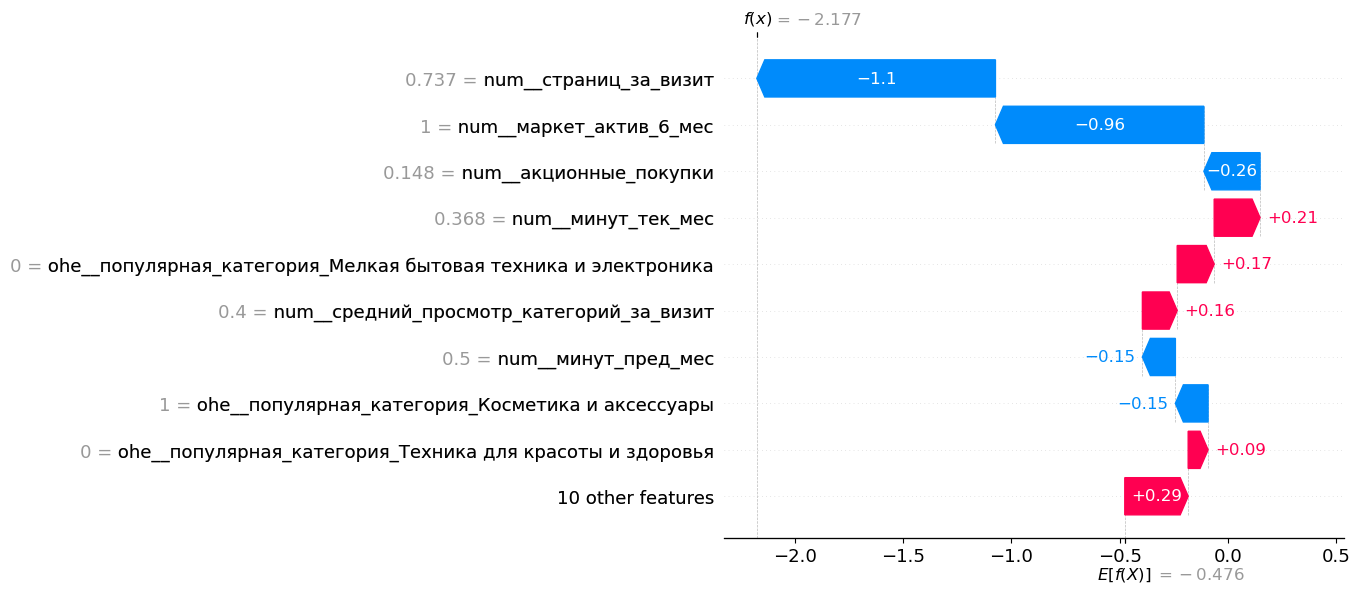

In [112]:
shap.plots.waterfall(shap_values[24]) 

На выбор класса повлияло высокое количество страниц за визит, высокое среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев а также низкий процент покупок по акции.

Посмотрим на некорректно классифицированный FP объект и то, какие признаки повлияли на решение модели.

In [113]:
X_test_df = pd.DataFrame()
X_test_df['y_test'] = y_test.tolist()
X_test_df['predict_proba'] = randomized_search.predict_proba(X_test)[:,1]

X_test_df[(X_test_df['y_test']==0)&(X_test_df['predict_proba']>0.5)].sample(random_state=RANDOM_STATE)

,y_test,predict_proba
95,0,0.636732


In [114]:
X_test.iloc[95]

тип_сервиса                                     стандарт
разрешить_сообщать                                    да
маркет_актив_6_мес                                   5.2
маркет_актив_тек_мес                                   5
длительность                                         638
акционные_покупки                                   0.15
популярная_категория                   Домашний текстиль
средний_просмотр_категорий_за_визит                    1
неоплаченные_продукты_штук_квартал                     5
ошибка_сервиса                                         8
страниц_за_визит                                       4
минут_пред_мес                                      17.0
минут_тек_мес                                       12.0
выручка_препред_мес                               4908.0
выручка_тек_мес                                   5533.0
Name: 216565, dtype: object

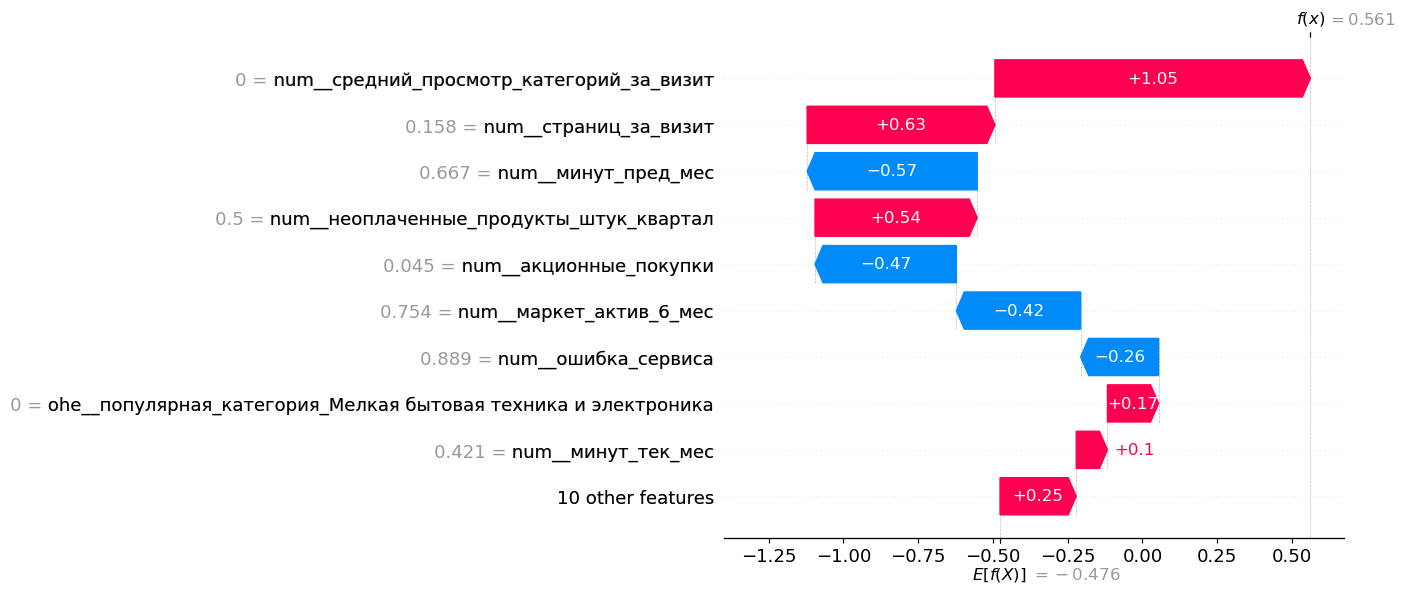

In [115]:
shap.plots.waterfall(shap_values[95]) 

На выбор класса повлияло малое количество категорий и страниц за визит, а также количество неоплаченных покупок в корзине выше среднего.

### Анализ важности признаков - итог

Оценили важность признаков для лучшей модели и построили график важности с помощью метода SHAP.

Больше всего влияют признаки:
+ среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца (с увеличением признака уменьшается вероятность снижения покупательской активности)
+ средний просмотр категорий за визит в течение последнего месяца (с увеличением признака уменьшается вероятность снижения покупательской активности)
+  время, проведённое на сайте в предыдущем месяце (с увеличением признака уменьшается вероятность снижения покупательской активности)
+ среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев (с увеличением признака увеличивается вероятность снижения покупательской активности)
+ время, проведённое на сайте в текущем месяце (с увеличением признака уменьшается вероятность снижения покупательской активности)

Меньше всего влияют признаки:
+ уровень сервиса
+ выручка за текущий месяц
+ количество маркетинговых коммуникаций в текущем месяце

## Сегментация покупателей

Выделим сегмент покупателей, и предложим, как увеличить его покупательскую активность.

Добавим в таблицу с данными прибыльность из таблицы ```money``` и предсказания модели о вероятности снижения покупательской активности.

In [116]:
money = money.set_index('id')

In [117]:
data_predict = X.join(money).reset_index()

In [118]:
X_new = pd.DataFrame(
    randomized_search.best_estimator_.named_steps['preprocessor'].transform(X)
)

In [119]:
predictions = model.predict_proba(X_new)[:, 1]

In [120]:
data_predict['предсказанная_вероятность_снижения'] = predictions

In [121]:
data_predict.shape

(1296, 18)

In [122]:
data_predict.head()

,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_пред_мес,минут_тек_мес,выручка_препред_мес,выручка_тек_мес,прибыль,предсказанная_вероятность_снижения
0,215349,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12.0,10.0,4472.0,4971.6,4.16,0.864785
1,215350,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8.0,13.0,4826.0,5058.4,3.13,0.361143
2,215351,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11.0,13.0,4793.0,6610.4,4.87,0.750786
3,215352,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8.0,11.0,4594.0,5872.5,4.21,0.939394
4,215353,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10.0,10.0,5124.0,5388.5,3.95,0.690820


Составим список признаков, по которым будем анализировать сегменты. 

In [123]:
main_features = ['страниц_за_визит', 'средний_просмотр_категорий_за_визит', 
                 'минут_пред_мес', 'акционные_покупки', 'минут_тек_мес',
                 'неоплаченные_продукты_штук_квартал'
                ]

### Группа с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью

Выделим группу с высокой прибыльностью и высокой предсказанной вероятностью снижения покупательской активности.

Будем считать высокой вероятностью 0.85 и выше.

In [124]:
data_predict['прибыль'].describe()

count    1296.000000
mean        3.997701
std         1.011198
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

In [125]:
group_1 = data_predict.query('прибыль > 4.6 and предсказанная_вероятность_снижения > 0.85')

Посмотрим на распределения признаков для этого сегмента.

In [126]:
group_1.describe()[main_features]

,страниц_за_визит,средний_просмотр_категорий_за_визит,минут_пред_мес,акционные_покупки,минут_тек_мес,неоплаченные_продукты_штук_квартал
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,3.900000,1.985714,9.571429,0.466286,10.042857,4.742857
std,1.580222,0.807445,2.243002,0.299571,2.392232,1.983159
min,1.000000,1.000000,5.000000,0.120000,6.000000,0.000000
25%,3.000000,1.000000,8.000000,0.250000,8.000000,3.000000
50%,4.000000,2.000000,10.000000,0.320000,10.000000,5.000000
75%,5.000000,2.000000,11.000000,0.890000,12.000000,6.000000
max,8.000000,4.000000,14.000000,0.990000,17.000000,10.000000


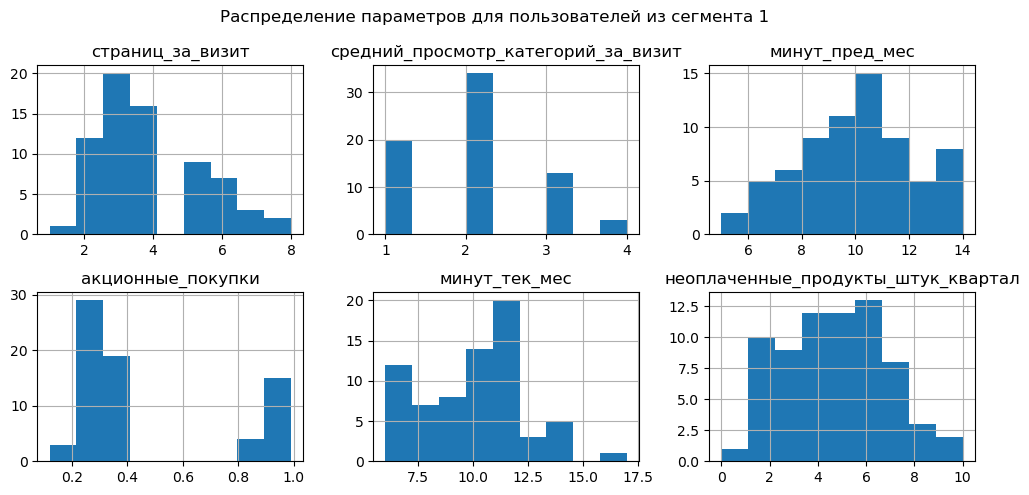

In [127]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
fig.suptitle('Распределение параметров для пользователей из сегмента 1')
for i, col in enumerate(main_features):
    axs[0+i//3, 0+i%3].hist([group_1[col]], bins='sqrt')
    axs[0+i//3, 0+i%3].set_title(col)
    axs[0+i//3, 0+i%3].grid(True)
fig.tight_layout()
plt.show()

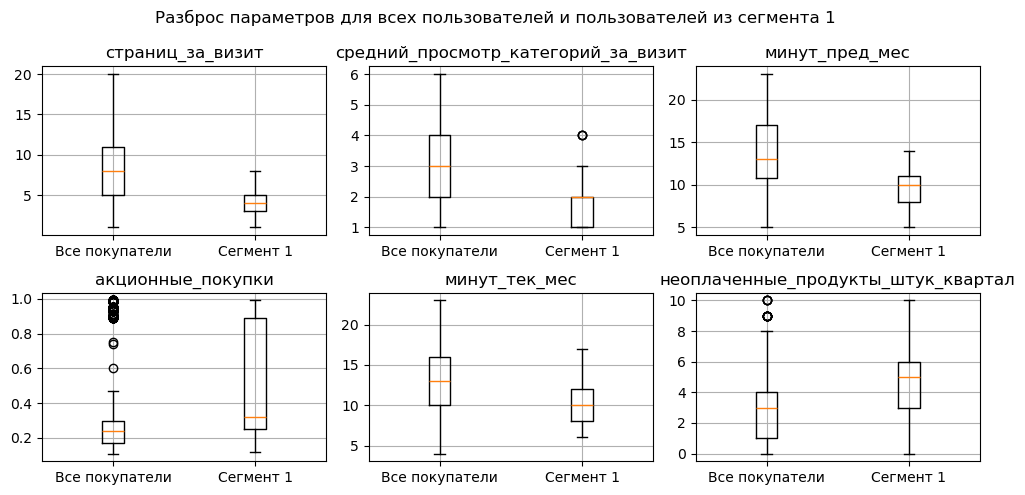

In [128]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
fig.suptitle('Разброс параметров для всех пользователей и пользователей из сегмента 1')
for i, col in enumerate(main_features):
    axs[0+i//3, 0+i%3].boxplot([data[col], group_1[col]], labels=['Все покупатели', 'Сегмент 1'])
    axs[0+i//3, 0+i%3].set_title(col)
    axs[0+i//3, 0+i%3].grid(True)
fig.tight_layout()
plt.show()

Покупатели этой категории проводят мало времени на сайте, просматривают меньше страниц (меньше пяти) и категорий (1-2). 

Имеют в среднем больше неоплаченных покупок в корзине.

В сегменте есть как покупатели, которые мало покупают по акции, так и значительное количество тех, кто покупает в основном по акции.

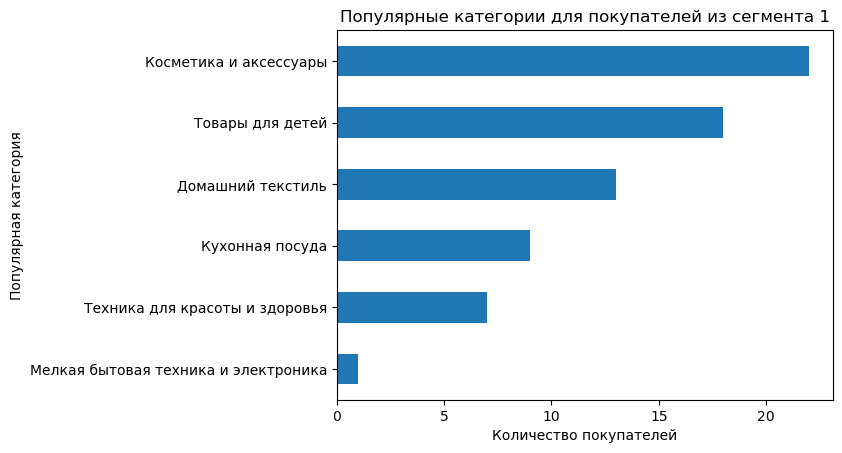

In [129]:
group_1['популярная_категория'].value_counts(ascending=True).plot(kind='barh')
plt.title('Популярные категории для покупателей из сегмента 1')
plt.xlabel('Количество покупателей')
plt.ylabel('Популярная категория')
plt.show()

Самая популярная категория - косметика и аксессуары, затем товары для детей и домашний текстиль.

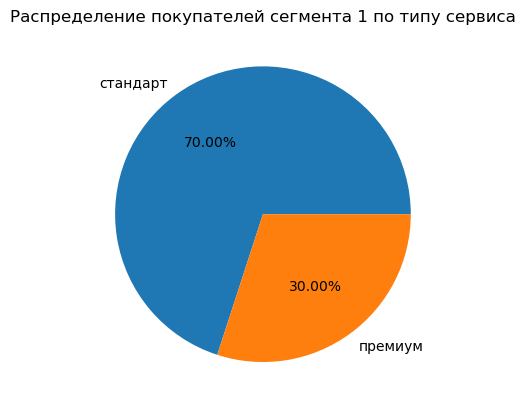

In [130]:
group_1['тип_сервиса'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Распределение покупателей сегмента 1 по типу сервиса')
plt.ylabel('')
plt.show()

В сегменте значительно больше пользователей типа "стандарт".

Предложения по сегменту:

+ количество неоплаченных покупок, оставленных в корзине, выше среднего. Нужно разобраться, в чем причина и снизить этот показатель:
    + возможно, покупателей часто не устраивают условия доставки, и они забрасывают заказ
    + возможно, у покупателей возникают проблемы с системой оплаты
+ покупатели из этого сегмента проводят мало времени на сайте и просматривают мало категорий. Нужно показывать им персонализированные предложения в популярных категориях.

### Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности

In [131]:
data_predict['акционные_покупки'].describe()

count    1296.000000
mean        0.320069
std         0.249159
min         0.110000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

In [132]:
group_2 = data_predict.query('акционные_покупки > 0.9 and предсказанная_вероятность_снижения > 0.85')

In [133]:
group_2.describe()[main_features + ['прибыль']]

,страниц_за_визит,средний_просмотр_категорий_за_визит,минут_пред_мес,акционные_покупки,минут_тек_мес,неоплаченные_продукты_штук_квартал,прибыль
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,4.096386,2.493976,9.698795,0.958072,10.216867,4.373494,3.913494
std,1.589711,1.063513,2.443183,0.024217,2.225398,2.387523,0.888718
min,1.000000,1.000000,5.000000,0.930000,5.000000,0.000000,1.810000
25%,3.000000,2.000000,8.000000,0.940000,8.500000,3.000000,3.210000
50%,4.000000,3.000000,10.000000,0.940000,10.000000,4.000000,4.010000
75%,5.000000,3.000000,11.000000,0.980000,11.500000,6.000000,4.425000
max,8.000000,6.000000,16.000000,0.990000,17.000000,10.000000,6.730000


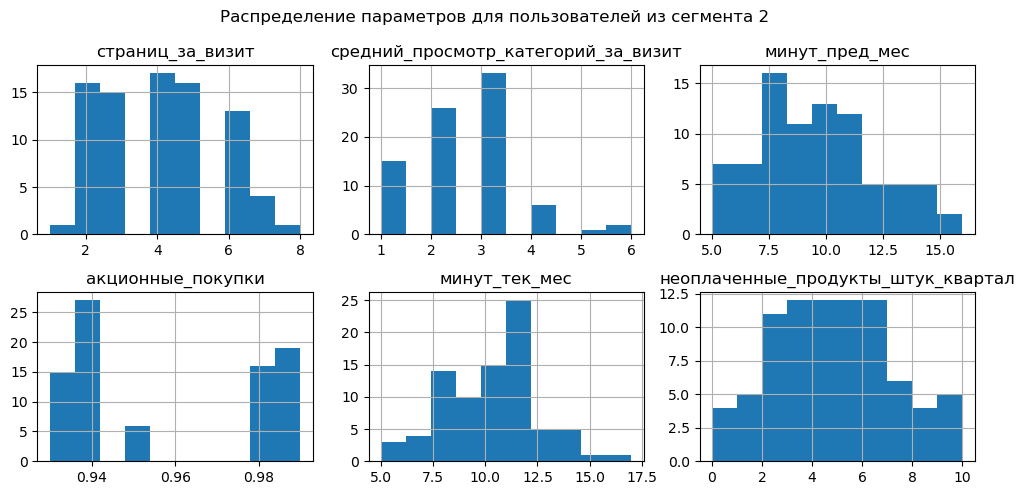

In [134]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
fig.suptitle('Распределение параметров для пользователей из сегмента 2')
for i, col in enumerate(main_features):
    axs[0+i//3, 0+i%3].hist([group_2[col]], bins='sqrt')
    axs[0+i//3, 0+i%3].set_title(col)
    axs[0+i//3, 0+i%3].grid(True)
fig.tight_layout()
plt.show()

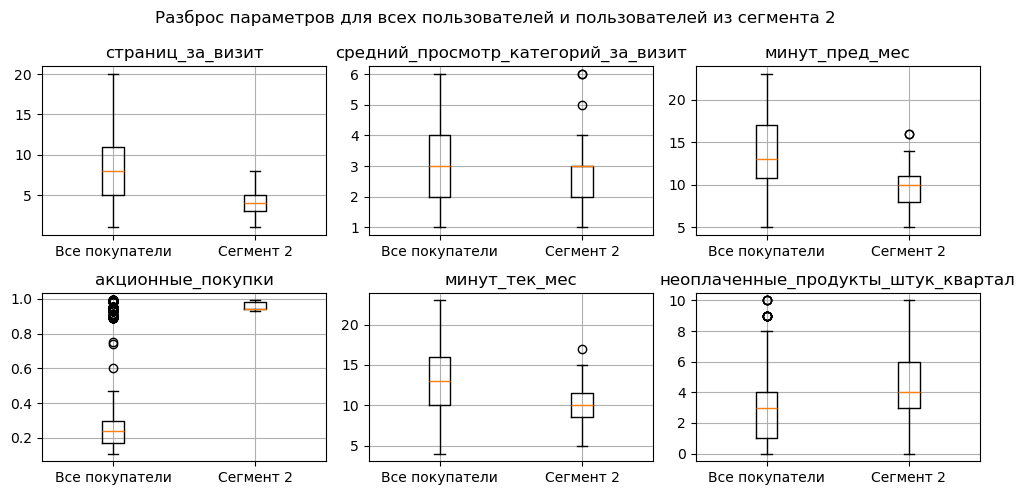

In [135]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
fig.suptitle('Разброс параметров для всех пользователей и пользователей из сегмента 2')
for i, col in enumerate(main_features):
    axs[0+i//3, 0+i%3].boxplot([data[col], group_2[col]], labels=['Все покупатели', 'Сегмент 2'])
    axs[0+i//3, 0+i%3].set_title(col)
    axs[0+i//3, 0+i%3].grid(True)
fig.tight_layout()
plt.show()

Покупатели этой категории просматривают не очень много страниц за визит (в основном 5 и меньше) и немного категорий (2-3). Совершают много покупок по акции (что логично, т.к. по этому признаку отбирался сегмент), и имеют в среднем больше неоплаченных покупок в корзине.

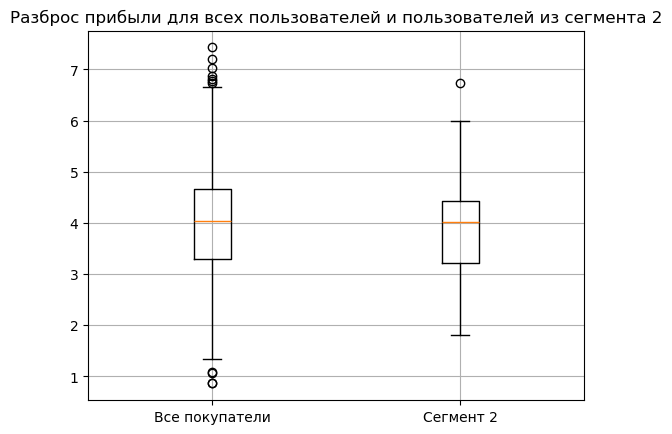

In [136]:
plt.boxplot([money['прибыль'], group_2['прибыль']], labels=['Все покупатели', 'Сегмент 2'])
plt.title('Разброс прибыли для всех пользователей и пользователей из сегмента 2')
plt.grid(True)
plt.show()

Медианная прибыльность сегмента (4.01) в целом сходна с медианной прибыльностью по всем покупателям (4.05), то есть сегмент покупающих в основном по акции достаточно важен. Однако если распределение прибыльности по всем покупателям было симметричным, то здесь видим скошенность влево.

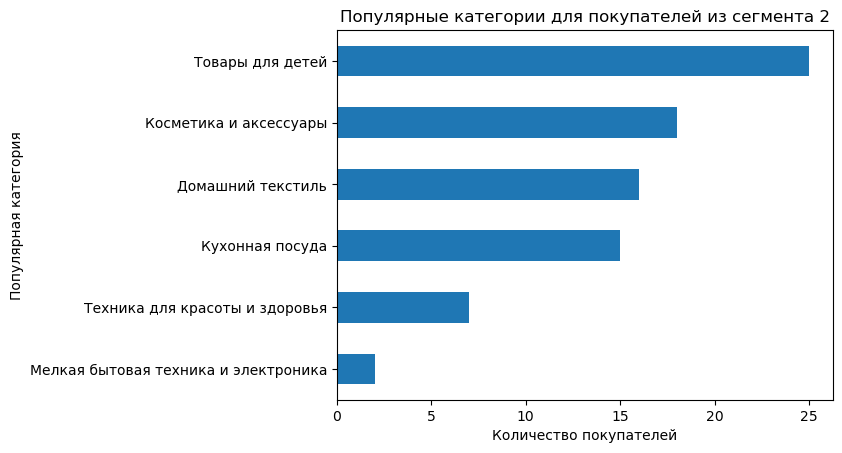

In [137]:
group_2['популярная_категория'].value_counts(ascending=True).plot(kind='barh')
plt.title('Популярные категории для покупателей из сегмента 2')
plt.xlabel('Количество покупателей')
plt.ylabel('Популярная категория')
plt.show()

Самая популярная категория покупок - товары для детей. Затем косметика и аксессуары.

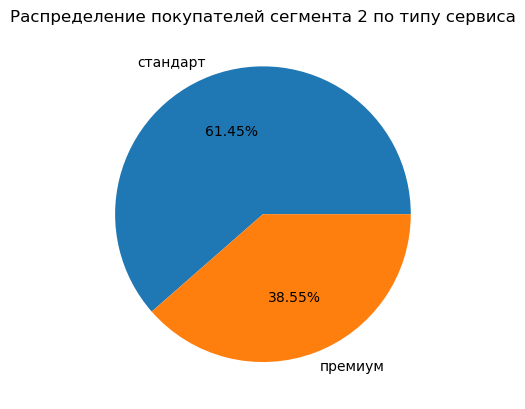

In [138]:
group_2['тип_сервиса'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Распределение покупателей сегмента 2 по типу сервиса')
plt.ylabel('')
plt.show()

В сегменте больше пользователей класса "стандарт".

Предложения по сегменту:

+ количество неоплаченных покупок, оставленных в корзине, в этом сегменте тоже выше среднего. Нужно разобраться, в чем причина и снизить этот показатель:
    + возможно, покупателей часто не устраивают условия доставки, и они забрасывают заказ
    + возможно, у покупателей возникают проблемы с системой оплаты
    + пользователи из этого сегмента  покупают много по акции - возможно, скидка на следующий заказ или иное бонусное предложение промотивируют покупателя завершить оформление заказа.
+ покупатели из этого сегмента просматривают не очень много категорий и совсем мало страниц. Возможно, нужно показывать им акции на популярные товары прямо на стартовой странице, чтобы не надо было долго искать.
+ популярная категория - товары для детей. Имеет смысл предлагать акции в этой категории. В то же время мало смысла в акциях на бытовую технику.

### Сегментация покупателей - итог

Рассмотрели два сегмента покупателей с высокой вероятностью снижения покупательской активности.

1. Первый сегмент - группа с высокой прибильностью и высокой вероятностью снижения покупательской активности:
    + популярная категория товаров - косметика и аксессуары. На втором месте товары для детей.
    + небольшое количество просмотренных страниц (в среднем 4) и категорий (1-2).
    + количество неоплаченных товаров, оставленных в корзине, выше среднего.
    + есть как покупатели почти без акционных покупок, так и покупающие в основном по акции.
    Предложения:
    + Нужно разобраться, в чем причина большого количество незавершенных заказов:
        + возможно, покупателей часто не устраивают условия доставки, и они забрасывают заказ
        + возможно, у покупателей возникают проблемы с системой оплаты
    + покупатели из этого сегмента проводят мало времени на сайте и просматривают мало категорий. Нужно показывать им персонализированные предложения в популярных категориях.
2. Второй сегмент - группа с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности:
    + доля покупок по акции - 0.9 и выше
    + просматривают не очень много категорий (2-3) и страниц (5 и менее)
    + количество неоплаченных товаров, оставленных в корзине, выше среднего.
    Предложения:
    + количество неоплаченных покупок, оставленных в корзине, в этом сегменте тоже выше среднего. Нужно разобраться, в чем причина и снизить этот показатель:
        + возможно, покупателей часто не устраивают условия доставки, и они забрасывают заказ
        + возможно, у покупателей возникают проблемы с системой оплаты
        + пользователи из этого сегмента покупают много по акции - возможно, скидка на следующий заказ или иное бонусное предложение промотивируют покупателя завершить оформление заказа.
    + покупатели из этого сегмента просматривают не очень много категорий и совсем мало страниц. Возможно, нужно показывать им акции на популярные товары прямо на стартовой странице, чтобы не надо было долго искать.
    + популярная категория - товары для детей. Имеет смысл предлагать акции в этой категории. В то же время мало смысла в акциях на бытовую технику и электронику.


## Общий вывод

Проанализировали данные о покупателях, спрогнозировали снижение покупательской активности, провели сегментацию покупателей и составили рекомендации для некоторых сегментов.
1. Провели предобработку данных: переименовали столбцы, проверили данные на наличие пропущенных значений и дубликатов.
2. Провели исследовательский анализ данных:
    В таблице ```market_df``` (```market_file.csv```) данные о поведении 1300 покупателей:
    + ```маркет_актив_6_мес``` - распределение ассиметричное. Пик значения приходится на 4.2. Минимальное значение - 0.9 (то есть нет покупателей, которые вообще не провзаимодействовали с маркетингом), максимальное - 6.6.
    + ```маркет_актив_тек_мес``` - принимает только три значения. На каждого покупателя в текущем месяце приходилось от 3 до 5 маркетинговых коммуникаций. Больше всего покупателей получили 4 маркетинговых коммуникации.
    + ```длительность``` - распределение ассиметричное. Медиана - 606 дней, минимум - 110 дней, максимум - 1079.
    + ```акционные_покупки``` - распределение ассиметричное. Пик приходится на 0.24, есть небольшой всплеск в районе 0.9.
    + ```средний_просмотр_категорий_за_визит``` - принимает целочисленные значения от 1 до 6. Больше всего покупателей просматривают 3 категории за визит.
     + ```неоплаченные_продукты_штук_квартал``` - принимает целочисленные значения от 0 до 10. У основной массы покупателей за квартал было от 1 до 3 неоплаченных покупок в корзине.
    + ```ошибка_сервиса``` - принимает целочисленные значения от 0 до 9. Большинство покупателей коснулось от 2 до 6 сбоев.
    + ```страниц_за_визит``` - пик в районе 6 страниц. Минимум 1 страница, максимум - 20 страниц.
    + ```покупательская_активность``` - целевой признак. Видим дисбаланс классов - менее 40% записей имеет класс "снизилась".
    + ```тип_сервиса``` - 2 значения - ```премиум``` и ```стандарт```. Большинство (71.1%) покупателей имеют тип "стандарт".
    + ```разрешить_сообщать``` - почти три четверти (74%) покупателей дали разрешение на рассылки.
    + ```популярная_категория``` - самая популярная категория - ```товары для детей```, затем ```домашний текстиль``` и ```косметика и аксессуары```. Наименее популярная категория - ```кухонная посуда```.

    В таблице ```market_time``` (```market_time.csv```) данные о времени (в минутах), которое покупатель провёл на сайте в течение одного из двух периодов - текущий месяц или предыдущий месяц. В среднем покупатели проводят на сайте 13 минут. Минимум - 4 минуты, максимум - 23.

    В таблице ```market_money``` (```market_money.csv```) данные о выручке, которую получает магазин с покупателя. Среднее и медиана - в районе 5000, основная масса значений лежит в промежутке от 4.5 до 5.5 тысяч.

    В таблице ```money``` (```money.csv```) данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. Среднее и медиана - в районе 4, минимальное значение - 0.86, максимальное - 7.43. На боксплоте видим небольшое количество выбросов сверху и снизу.

    В результате анализа нашли и удалили выброс выручки (более 100000 при медиане 5000) в таблице ```market_money```.

    Отобрали клиентов с покупательской активностью не менее трёх месяцева - удалили данные трех покупателей с активностью менее трех месяцев (не совершали покупки в предыдущем и препредыдущем месяцах). 
3. Объединили таблицы ```market_df```, ```market_time```, ```market_money```. Для данных из таблиц ```market_time``` и ```market_money``` за разные периоды создали отдельные столбцы.
4. Провели коррелационный анализ данных. Сделали выводы о мультиколлинеарности: есть высокая корреляция между признаками ```выручка_тек_мес``` и ```выручка_пред_мес```. Устранили мультиколлинеарность, удалив из таблицы признак ```выручка_пред_мес```.
5. Подобрали лучшую модель и ее параметры, используя пайплайны и RandomizedSearchCV.

    Использовали метрику ROC-AUC, т.к. она хорошо подходит для нашей задачи (бинарная классификация с несбалансированной выборкой).

    Лучшая модель - LogisticRegression(C=2).

    ROC-AUC на кросс-валидации: 0.898.

    ROC-AUC на тестовой выборке: 0.893.
    
6. Оценили важность признаков для лучшей модели и построили график важности с помощью метода SHAP.

    Больше всего влияют признаки:
    + среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца (с увеличением признака уменьшается вероятность снижения покупательской активности)
    + средний просмотр категорий за визит в течение последнего месяца (с увеличением признака уменьшается вероятность снижения покупательской активности)
    +  время, проведённое на сайте в предыдущем месяце (с увеличением признака уменьшается вероятность снижения покупательской активности)
    + среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев (с увеличением признака увеличивается вероятность снижения покупательской активности)
    + время, проведённое на сайте в текущем месяце (с увеличением признака уменьшается вероятность снижения покупательской активности)

    Меньше всего влияют признаки:
    + уровень сервиса
    + выручка за текущий месяц
    + количество маркетинговых коммуникаций в текущем месяце
    
7. Рассмотрели два сегмента покупателей с высокой вероятностью снижения покупательской активности.

    Первый сегмент - группа с высокой прибильностью и высокой вероятностью снижения покупательской активности:
    + популярная категория товаров - косметика и аксессуары. На втором месте товары для детей.
    + небольшое количество просмотренных страниц (в среднем 4) и категорий (1-2).
    + количество неоплаченных товаров, оставленных в корзине, выше среднего.
    + есть как покупатели почти без акционных покупок, так и покупающие в основном по акции.
    Предложения:
    + Нужно разобраться, в чем причина большого количество незавершенных заказов:
        + возможно, покупателей часто не устраивают условия доставки, и они забрасывают заказ
        + возможно, у покупателей возникают проблемы с системой оплаты
    + покупатели из этого сегмента проводят мало времени на сайте и просматривают мало категорий. Нужно показывать им персонализированные предложения в популярных категориях.
    
    Второй сегмент - группа с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности:
    + доля покупок по акции - 0.9 и выше
    + просматривают не очень много категорий (2-3) и страниц (5 и менее)
    + количество неоплаченных товаров, оставленных в корзине, выше среднего.
    Предложения:
    + количество неоплаченных покупок, оставленных в корзине, в этом сегменте тоже выше среднего. Нужно разобраться, в чем причина и снизить этот показатель:
        + возможно, покупателей часто не устраивают условия доставки, и они забрасывают заказ
        + возможно, у покупателей возникают проблемы с системой оплаты
        + пользователи из этого сегмента покупают много по акции - возможно, скидка на следующий заказ или иное бонусное предложение промотивируют покупателя завершить оформление заказа.
    + покупатели из этого сегмента просматривают не очень много категорий и совсем мало страниц. Возможно, нужно показывать им акции на популярные товары прямо на стартовой странице, чтобы не надо было долго искать.
    + популярная категория - товары для детей. Имеет смысл предлагать акции в этой категории. В то же время мало смысла в акциях на бытовую технику и электронику.


[В начало](#title)